In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("cleared_dataset_dataco_supplychain.csv")

In [3]:
df.head()

Order Id    Order Region      Order State  Product Status  \
0     77202  Southeast Asia  Java Occidental               0   
1     75939      South Asia         Rajastán               0   
2     75938      South Asia         Rajastán               0   
3     75937         Oceania       Queensland               0   
4     75936         Oceania       Queensland               0   

  order date (DateOrders)     Order Status  Customer Id Customer Segment  \
0     2018-01-31 22:56:00         COMPLETE        20755         Consumer   
1     2018-01-13 12:27:00          PENDING        19492         Consumer   
2     2018-01-13 12:06:00           CLOSED        19491         Consumer   
3     2018-01-13 11:45:00         COMPLETE        19490      Home Office   
4     2018-01-13 11:24:00  PENDING_PAYMENT        19489        Corporate   

  Customer Country Customer State  ... Order Country  Order City  \
0      Puerto Rico             PR  ...     Indonesia      Bekasi   
1      Puerto Rico             PR  ...         India     Bikaner   
2          EE. UU.             CA  ...         India     Bikaner   
3          EE. UU.             CA  ...     Australia  Townsville   
4      Puerto Rico             PR  ...     Australia  Townsville   

   Product Name      Type  shipping date (DateOrders)   Shipping Mode  \
0  Smart watch      DEBIT         2018-02-03 22:56:00  Standard Class   
1  Smart watch   TRANSFER         2018-01-18 12:27:00  Standard Class   
2  Smart watch       CASH         2018-01-17 12:06:00  Standard Class   
3  Smart watch      DEBIT         2018-01-16 11:45:00  Standard Class   
4  Smart watch    PAYMENT         2018-01-15 11:24:00  Standard Class   

   Days for shipping (real)  Days for shipment (scheduled)  \
0                         3                              4   
1                         5                              4   
2                         4                              4   
3                         3                              4   
4                         2                              4   

   Late_delivery_risk   Delivery Status  
0                   0  Advance shipping  
1                   1     Late delivery  
2                   0  Shipping on time  
3                   0  Advance shipping  
4                   0  Advance shipping  

[5 rows x 35 columns]

In [4]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
datetime_val = datetime.strptime('2017-10-02 12:46:00', '%Y-%m-%d %H:%M:%S')
df_clean = df[df["order date (DateOrders)"] <= datetime_val]
df_clean.head(), df_clean.shape

(    Order Id  Order Region        Order State  Product Status  \
 48     28744    South Asia      Uttar Pradesh               0   
 49     45461     West Asia              Bursa               0   
 50     31115       Oceania  Australia del Sur               0   
 51     45766     West Asia           Estambul               0   
 52     47752  Eastern Asia         Ulán Bator               0   
 
    order date (DateOrders)     Order Status  Customer Id Customer Segment  \
 48     2016-02-24 13:57:00  PENDING_PAYMENT         9083      Home Office   
 49     2016-10-25 14:39:00  PENDING_PAYMENT         4741      Home Office   
 50     2016-03-30 04:37:00  PENDING_PAYMENT          639      Home Office   
 51     2016-10-30 01:31:00  PENDING_PAYMENT         9702      Home Office   
 52     2016-11-28 01:18:00  PENDING_PAYMENT         9114      Home Office   
 
    Customer Country Customer State  ... Order Country     Order City  \
 48      Puerto Rico             PR  ...         India     

# 지역별 판매 분석

In [5]:
region_sales = df_clean.groupby('Order Region').agg(
    Total_Orders=pd.NamedAgg(column='Order Id', aggfunc='count'),
    Total_Sales=pd.NamedAgg(column='Sales', aggfunc='sum'),
    Average_Sales_Per_Order=pd.NamedAgg(column='Sales', aggfunc='mean')
).reset_index()

region_sales_sorted = region_sales.sort_values(by='Total_Sales', ascending=False)

region_sales_sorted

Order Region  Total_Orders   Total_Sales  Average_Sales_Per_Order
3   Central America         28341  5.665712e+06               199.912216
22   Western Europe         25557  5.206489e+06               203.720660
12    South America         14935  2.960881e+06               198.251182
10  Northern Europe          9203  1.892093e+06               205.595188
17  Southern Europe          8872  1.798318e+06               202.695842
11          Oceania          8712  1.720379e+06               197.472362
1         Caribbean          8318  1.651019e+06               198.487537
21     West of USA           7993  1.571416e+06               196.599019
15   Southeast Asia          7790  1.538177e+06               197.455318
6       East of USA          6915  1.371112e+06               198.280837
13       South Asia          6612  1.299776e+06               196.578330
20        West Asia          6009  1.174672e+06               195.485403
7      Eastern Asia          5964  1.170048e+06               196.185096
18       US Center           5887  1.151356e+06               195.575976
14   South of  USA           4045  7.857839e+05               194.260555
8    Eastern Europe          3920  7.742666e+05               197.516981
19      West Africa          3696  7.279512e+05               196.956492
9      North Africa          3232  6.347522e+05               196.396108
5       East Africa          1852  3.762349e+05               203.150593
2    Central Africa          1677  3.272630e+05               195.147893
16  Southern Africa          1157  2.282516e+05               197.278820
0            Canada           959  1.868610e+05               194.849889
4      Central Asia           553  1.098399e+05               198.625556

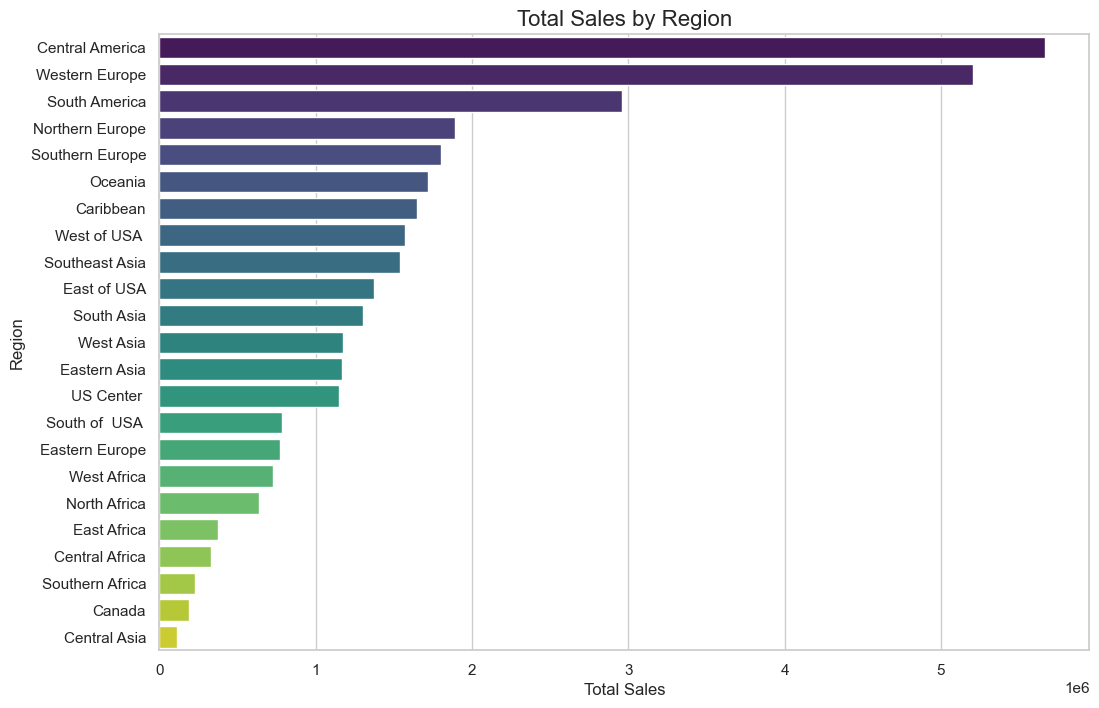

In [6]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='Total_Sales', y='Order Region', data=region_sales_sorted, ax=ax, palette="viridis")
ax.set_title('Total Sales by Region', fontsize=16)
ax.set_xlabel('Total Sales', fontsize=12)
ax.set_ylabel('Region', fontsize=12)

plt.show()

In [7]:
top_products_by_region = df_clean.groupby(['Order Region', 'Product Name']).size().reset_index(name='Count')

top_products_by_region = top_products_by_region.loc[top_products_by_region.groupby('Order Region')['Count'].idxmax()]

top_products_by_region.sort_values(by='Count', ascending=False)

Order Region                             Product Name  Count
242   Central America         Perfect Fitness Perfect Rip Deck   4035
1406   Western Europe         Perfect Fitness Perfect Rip Deck   3667
785     South America         Perfect Fitness Perfect Rip Deck   2046
639   Northern Europe         Perfect Fitness Perfect Rip Deck   1293
1090  Southern Europe         Perfect Fitness Perfect Rip Deck   1243
708           Oceania         Perfect Fitness Perfect Rip Deck   1236
1321     West of USA          Perfect Fitness Perfect Rip Deck   1216
101         Caribbean         Perfect Fitness Perfect Rip Deck   1199
957    Southeast Asia         Perfect Fitness Perfect Rip Deck   1139
849        South Asia         Perfect Fitness Perfect Rip Deck    945
393       East of USA         Perfect Fitness Perfect Rip Deck    927
1267        West Asia         Perfect Fitness Perfect Rip Deck    867
1159       US Center          Perfect Fitness Perfect Rip Deck    849
447      Eastern Asia         Perfect Fitness Perfect Rip Deck    813
903    South of  USA          Perfect Fitness Perfect Rip Deck    586
501    Eastern Europe         Perfect Fitness Perfect Rip Deck    566
1213      West Africa         Perfect Fitness Perfect Rip Deck    508
555      North Africa         Perfect Fitness Perfect Rip Deck    482
342       East Africa         Perfect Fitness Perfect Rip Deck    279
165    Central Africa         Perfect Fitness Perfect Rip Deck    241
998   Southern Africa  Nike Men's CJ Elite 2 TD Football Cleat    157
27             Canada         Perfect Fitness Perfect Rip Deck    145
288      Central Asia  Nike Men's CJ Elite 2 TD Football Cleat     86

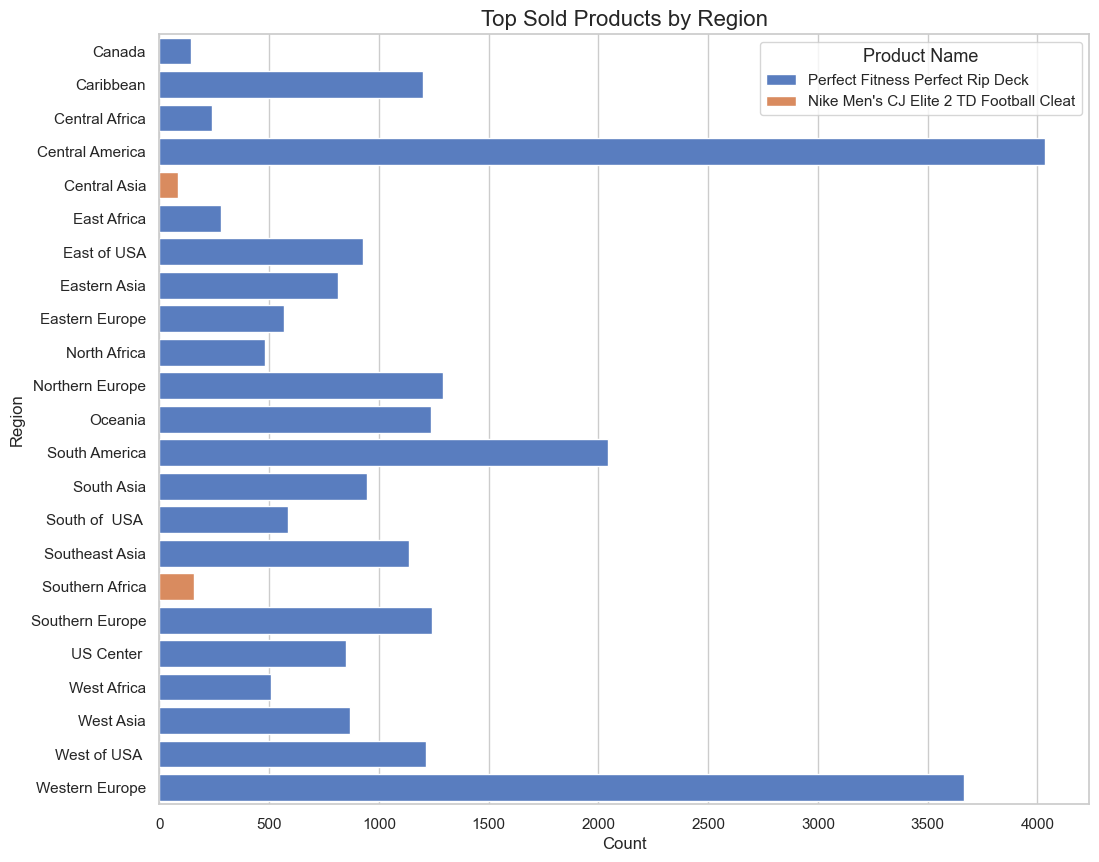

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.barplot(x='Count', y='Order Region', hue='Product Name', dodge=False, data=top_products_by_region, ax=ax, palette="muted")
ax.set_title('Top Sold Products by Region', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Region', fontsize=12)
ax.legend(title='Product Name', title_fontsize='13', fontsize='11')

plt.show()

### 지역별 이익 분석

In [9]:
region_profit = df_clean.groupby('Order Region').agg(
    Total_Profit=pd.NamedAgg(column='Order Profit Per Order', aggfunc='sum'),
    Average_Profit_Per_Order=pd.NamedAgg(column='Order Profit Per Order', aggfunc='mean')
).reset_index()

region_profit_sorted = region_profit.sort_values(by='Total_Profit', ascending=False)

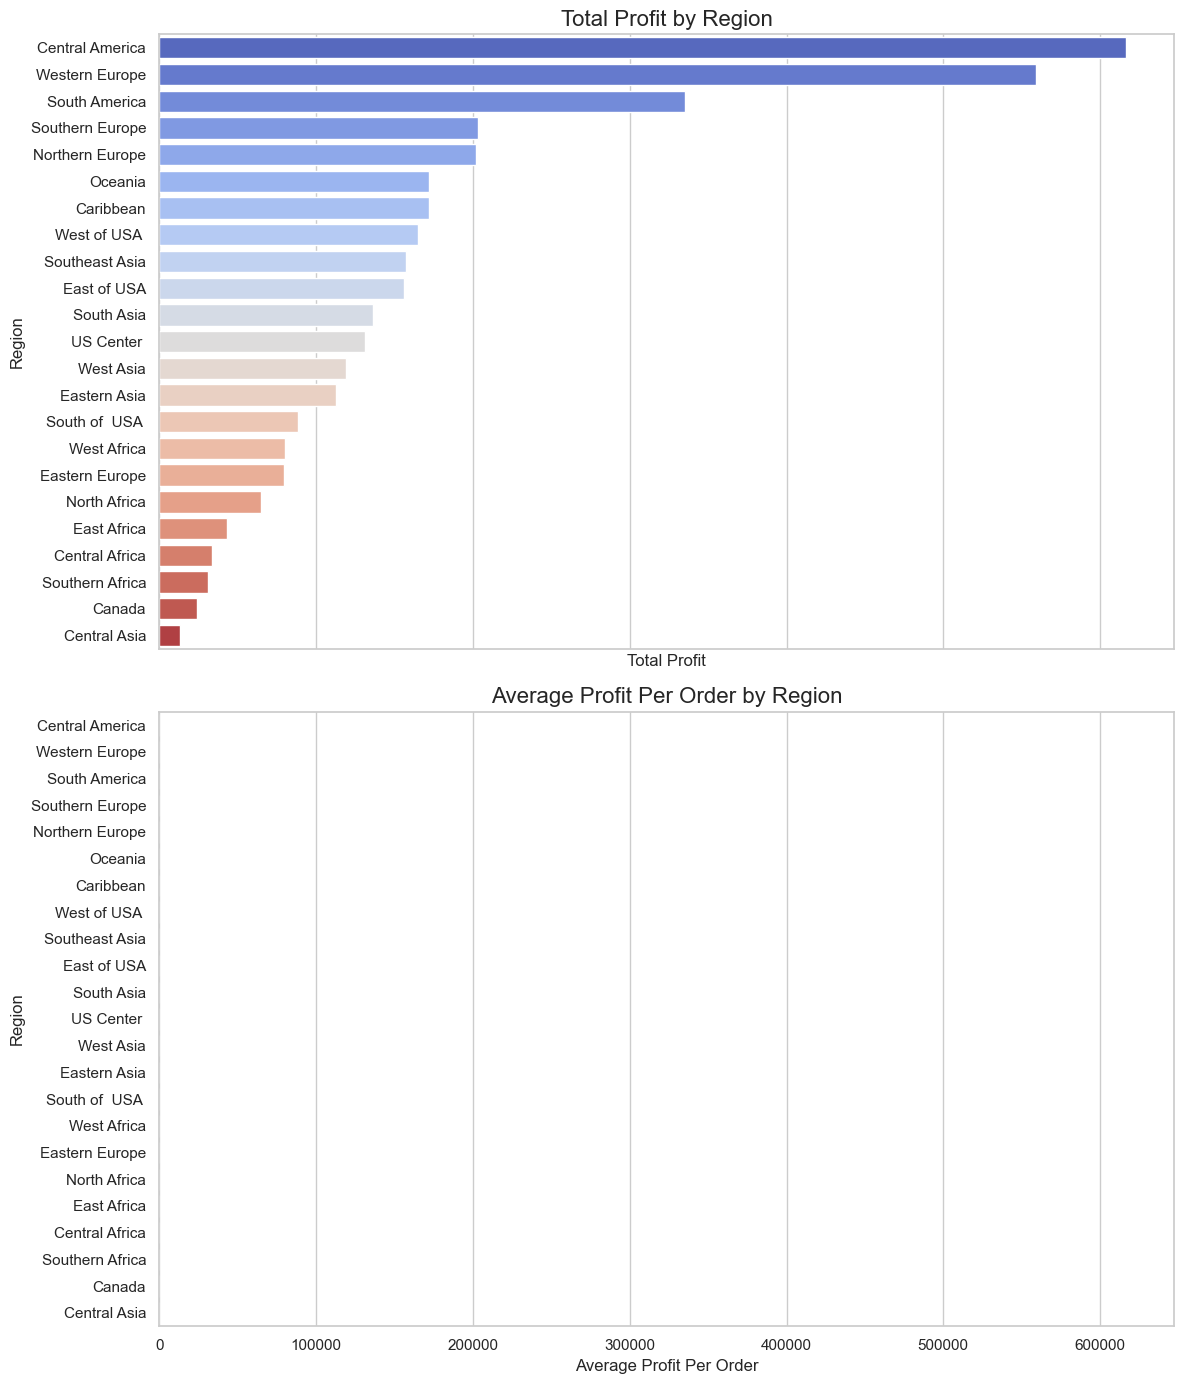

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14), sharex=True)

sns.barplot(x='Total_Profit', y='Order Region', data=region_profit_sorted, ax=ax[0], palette="coolwarm")
ax[0].set_title('Total Profit by Region', fontsize=16)
ax[0].set_xlabel('Total Profit', fontsize=12)
ax[0].set_ylabel('Region', fontsize=12)

sns.barplot(x='Average_Profit_Per_Order', y='Order Region', data=region_profit_sorted, ax=ax[1], palette="coolwarm")
ax[1].set_title('Average Profit Per Order by Region', fontsize=16)
ax[1].set_xlabel('Average Profit Per Order', fontsize=12)
ax[1].set_ylabel('Region', fontsize=12)

plt.tight_layout()
plt.show()

## 분기별 지역별 매출 과 이익

C:\Users\User\AppData\Local\Temp\ipykernel_22092\266216190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['order date (DateOrders)'].dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_22092\266216190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Quarter'] = df_clean['order date (DateOrders)'].dt.to_period('Q')
C:\Users\User\AppData\Local\Temp\ipykernel_22092\266216190.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) w

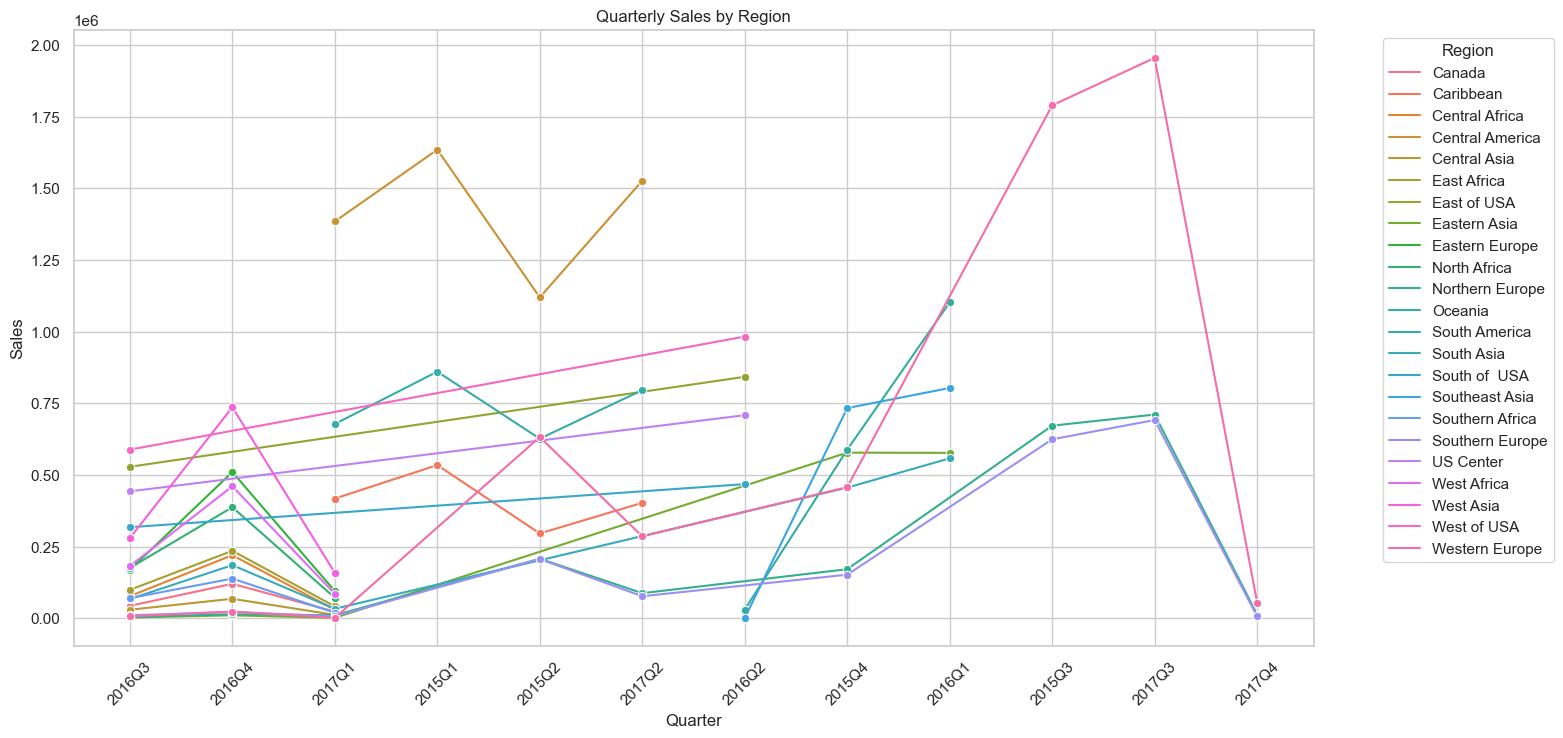

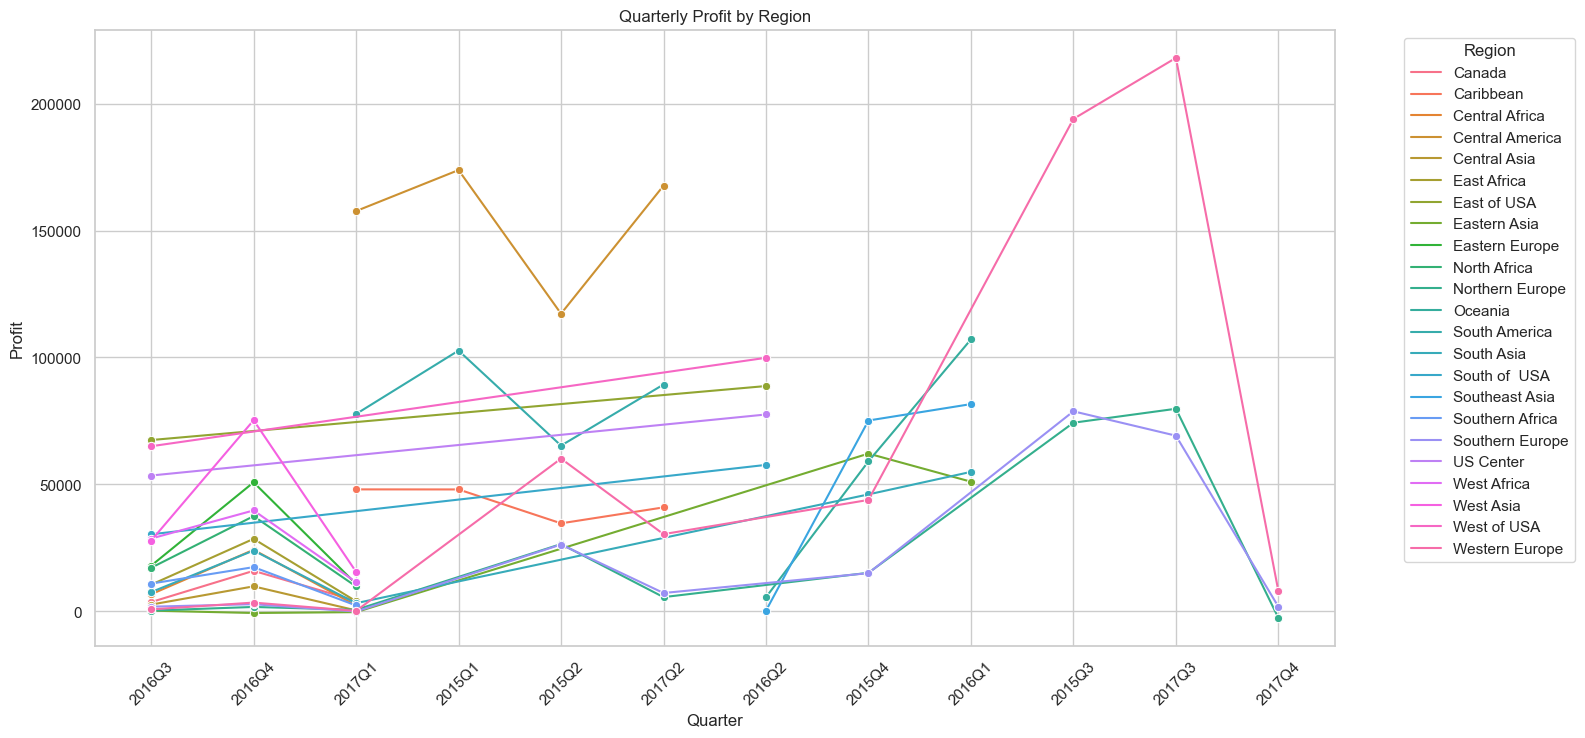

In [15]:
df_clean['Year'] = df_clean['order date (DateOrders)'].dt.year
df_clean['Quarter'] = df_clean['order date (DateOrders)'].dt.to_period('Q')

# 지역별, 연도별, 분기별로 매출과 이익 집계
grouped_data = df_clean.groupby(['Order Region', 'Year', 'Quarter'])['Sales', 'Order Profit Per Order'].sum().reset_index()

df_clean['Quarter'] = df_clean['Quarter'].astype(str)

if 'Sales' in df_clean.columns and 'Order Profit Per Order' in df_clean.columns:
    # 주문 날짜를 이용해 연도와 분기를 추출하고, 이를 기반으로 지역별로 매출과 이익을 집계
    df_clean['order date (DateOrders)'] = pd.to_datetime(df_clean['order date (DateOrders)'])
    df_clean['Year'] = df_clean['order date (DateOrders)'].dt.year
    df_clean['Quarter'] = df_clean['order date (DateOrders)'].dt.to_period('Q').astype(str)
    
    # 지역별, 연도별, 분기별로 매출과 이익 집계
    grouped_data_actual = df_clean.groupby(['Order Region', 'Year', 'Quarter'])[['Sales', 'Order Profit Per Order']].sum().reset_index()

    # 실제 데이터로 시각화 진행
    plt.figure(figsize=(16, 8))
    sns.lineplot(data=grouped_data_actual, x='Quarter', y='Sales', hue='Order Region', marker='o')
    plt.title('Quarterly Sales by Region')
    plt.xlabel('Quarter')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

    plt.figure(figsize=(16, 8))
    sns.lineplot(data=grouped_data_actual, x='Quarter', y='Order Profit Per Order', hue='Order Region', marker='o')
    plt.title('Quarterly Profit by Region')
    plt.xlabel('Quarter')
    plt.ylabel('Profit')
    plt.xticks(rotation=45)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

    plt.show()
else:
    error_message = "The 'Sales' and/or 'Order Profit Per Order' columns are missing from the dataset."
    error_message

각 지역마다 중요한 문화적 또는 계절적 행사가 매출에 영향을 줄 수 있다. 미국에서는 4분기의 블랙 프라이데이와 크리마스마스 쇼핑시즌, 중국은 춘절이 매출증가를 이끈다.
일부 제품의 판매는 계절에 따라 크게 달라진다. 예를 들어, 북반구의 겨울에는 난방 제품의 수요 증가, 여름에는 냉방 제품의 수요가 증가하게 된다.
각 지역별 도메인적 요인이 어떻게 작용하는지 파악하는것이 중요하며, 이를 통해 전략수립이 가능할 듯?


In [18]:
region_stats = df_clean.groupby('Order Region').agg({
    'Sales': ['mean', 'std'],
    'Order Profit Per Order': ['mean', 'std']
}).reset_index()

# 결과의 표준 편차가 높은 상위 지역을 추출
high_variance_regions = region_stats.sort_values(by=('Sales', 'std'), ascending=False).head()

# 결과 출력
high_variance_regions

Order Region       Sales             Order Profit Per Order            
                           mean         std                   mean         std
10  Northern Europe  205.595188  118.731880              21.933037  108.563692
22   Western Europe  203.720660  116.602284              21.874952  100.243940
5       East Africa  203.150593  115.881716              23.308709  100.679549
17  Southern Europe  202.695842  115.322655              22.925470   96.843498
11          Oceania  197.472362  112.867420              19.728281   98.877484

북유럽 : 매출의 표준 편차가 가장 높고, 이익도 상대적으로 큰 편차를 보인다. 이는 시즌에 따라 소비패턴이 크게 변동할 수 있다를 의미.  
남유럽 : 높은 매출 변동성을 보이며, 이익도 상당한 변동 성을 보임  
서유럽 : 매출과 이익 모두에서 높은 변동성을 보이는 지역, 유럽 내에서도 꽤나 중요한 시장 변화를 겪고 있을 듯?  
동아시아 : 아시아 지역 중에서 동아시아가 높은 매출 변동성을 보이고, 이익의 변동성 또한 높음  
동남아시아 : 매출과 이익 모두에서 변동성이 높아 시장의 다양한 변화를 보여줌

## 지역별 분석과 다른 컬럼들의 상관관계

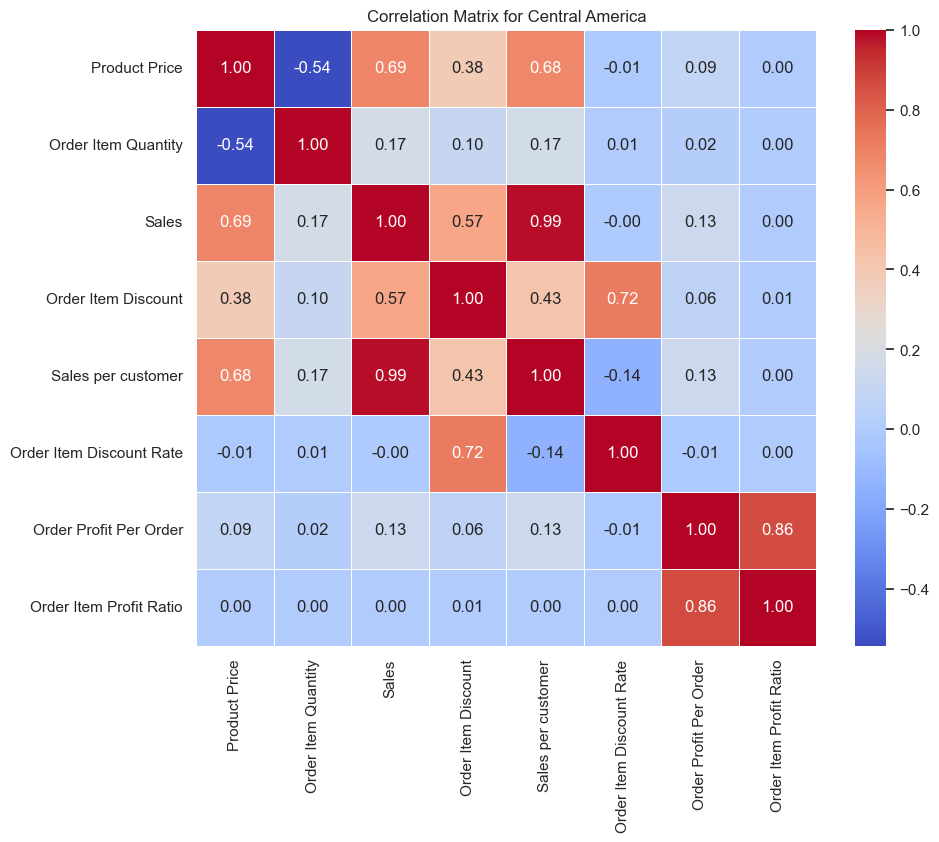

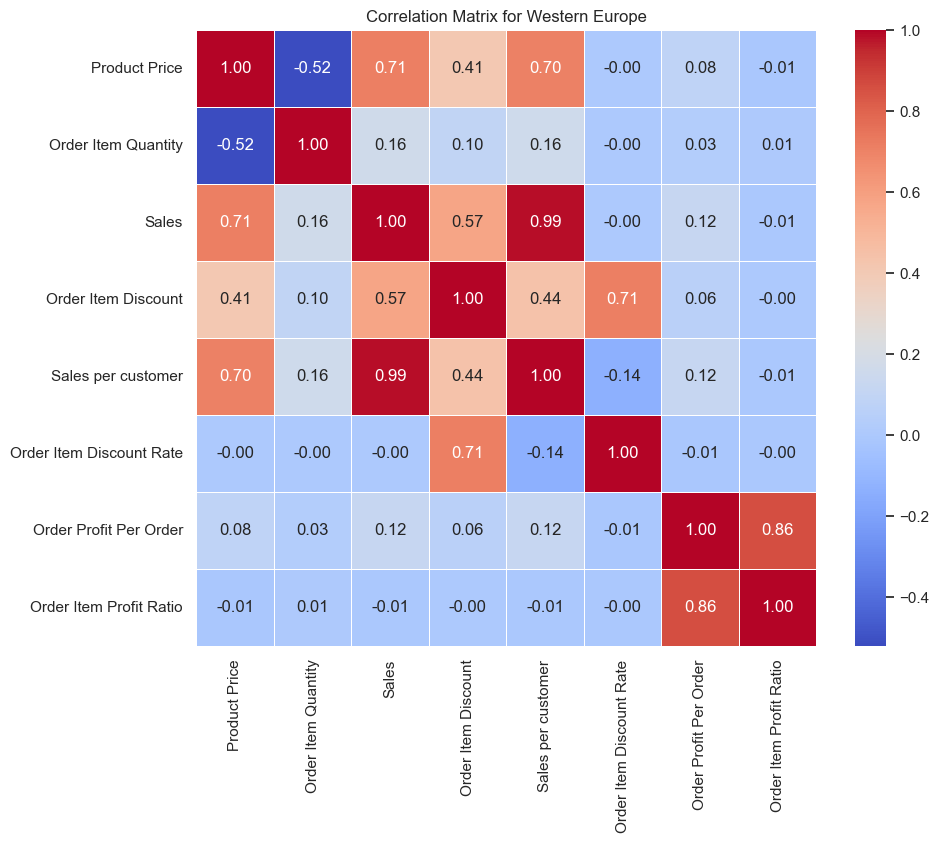

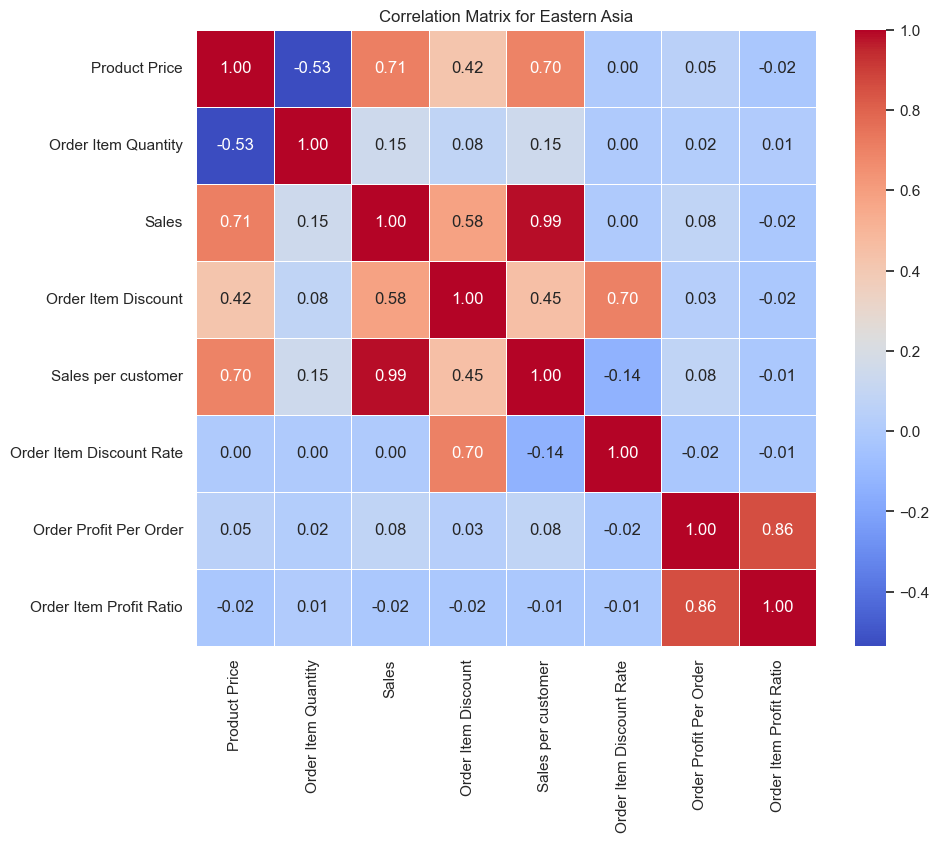

In [24]:
extended_numeric_columns = [
    'Product Price', 'Order Item Quantity', 'Sales', 'Order Item Discount',
    'Sales per customer', 'Order Item Discount Rate', 'Order Profit Per Order',
    'Order Item Profit Ratio']

selected_regions = ['Central America', 'Western Europe', 'Eastern Asia']

# 각 지역별로 상관관계 분석
region_correlation_figures = []
for region in selected_regions:
    # 지역별 데이터 추출
    region_data = df_clean[df_clean['Order Region'] == region]
    
    # 지정된 수치형 변수에 대한 상관관계 행렬 계산
    region_correlation_matrix = region_data[extended_numeric_columns].corr()
    
    # 상관관계 행렬을 히트맵으로 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(region_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix for {region}')
    plt.show()

# 지역별 제품 카테고리 분석

In [36]:
# 지역별, 제품 카테고리별로 매출과 이익 집계
category_region_sales_profit = df_clean.groupby(['Order Region', 'Category Name']).agg({
    'Sales': 'sum',
    'Order Profit Per Order': 'sum'
}).reset_index()

# 이익률 계산
category_region_sales_profit['Profit Margin (%)'] = (category_region_sales_profit['Order Profit Per Order'] / category_region_sales_profit['Sales']) * 100

# 결과 확인
category_region_sales_profit.sort_values(by=['Order Region', 'Profit Margin (%)'], ascending=[True, False]).head(10)


Order Region        Category Name         Sales  Order Profit Per Order  \
17       Canada             Lacrosse    124.949997               42.730000   
15       Canada   Hunting & Shooting    119.959999               35.770000   
20       Canada     Tennis & Racquet    314.930012               93.410002   
14       Canada               Hockey    169.000000               49.520000   
1        Canada  Baseball & Softball    104.970001               30.440001   
0        Canada          Accessories   1149.539995              325.210000   
13       Canada           Golf Shoes    650.000000              165.989998   
7        Canada              Fishing  27598.620759             6567.470044   
21       Canada             Trade-In    373.799999               82.770000   
2        Canada         Boxing & MMA    769.580017              141.489999   

    Profit Margin (%)  
17          34.197680  
15          29.818273  
20          29.660559  
14          29.301775  
1           28.998762  
0           28.290447  
13          25.536923  
7           23.796370  
21          22.142857  
2           18.385353

캐나다 지역에서는  
Lacrosse: 이익률이 약 34.2%로, 매우 높은 수익성을 나타남  
Hunting & Shooting: 이익률이 약 29.8%로, 또한 높은 수익성을 보임  
Tennis & Racquet: 이익률이 약 29.7%로, 높은 수익을 나타남    
Hockey와 Baseball & Softball 또한 각각 29.3%와 29.0%의 이익률을 보여줌    
  
각 지역에서의 수익성이 높은 제품 카테고리에 대한 투자를 증가하거나, 특정 카테고리의 마케팅을 강화하면 좋을듯  
이익률이 낮은 카테고리에 대해서는 가격 재검토 및 비용 절감 방안 모색

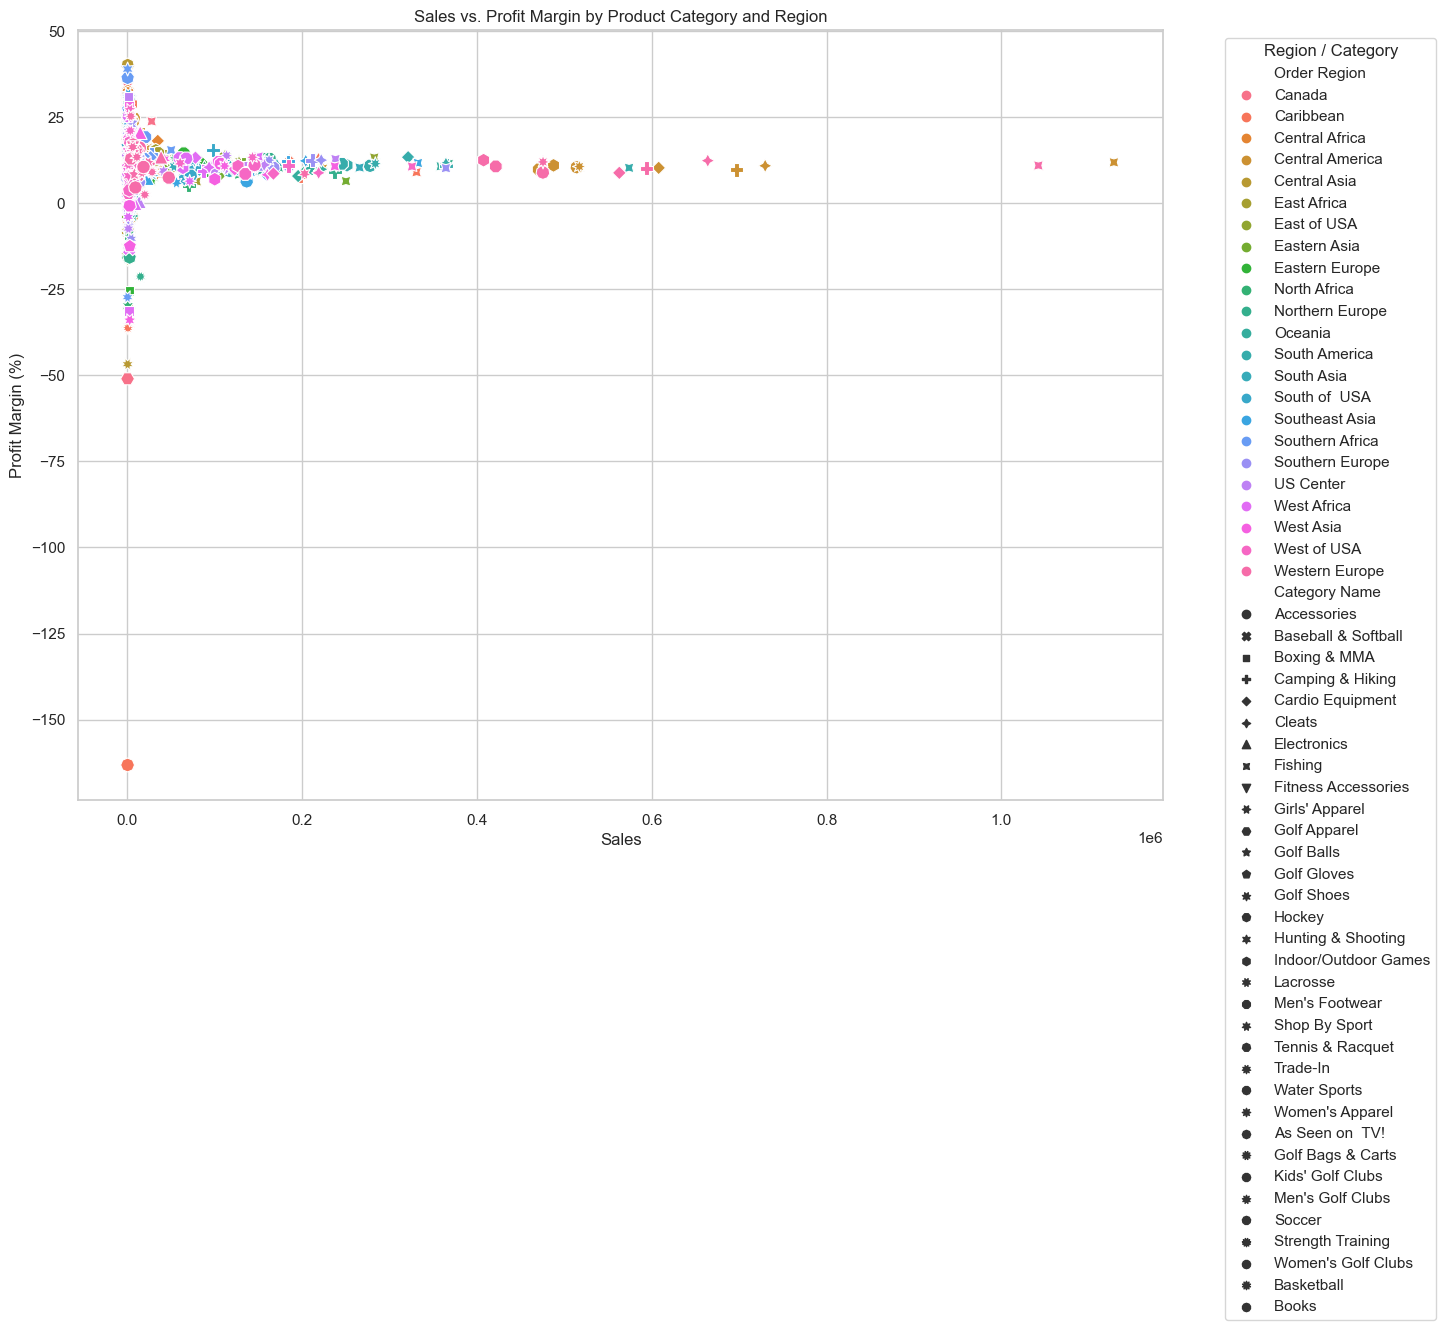

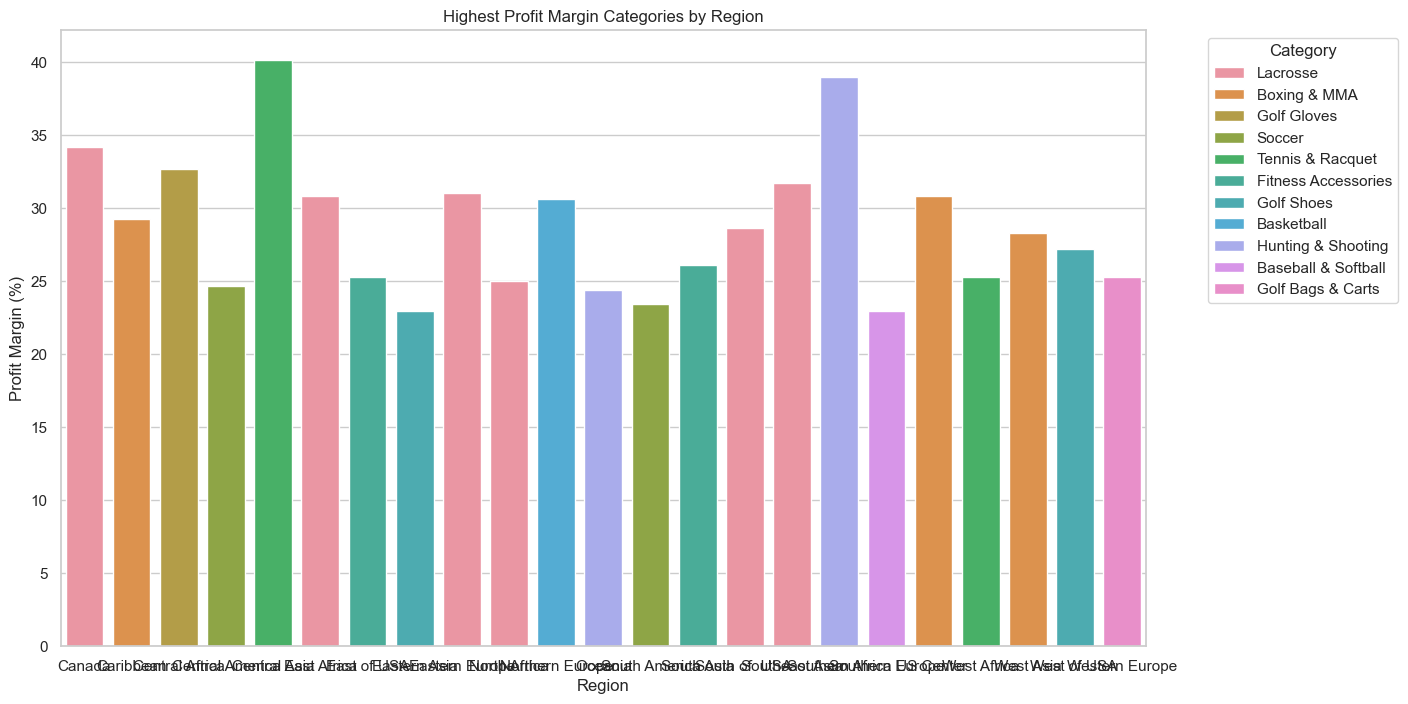

In [37]:
plt.figure(figsize=(14, 10))
scatter_plot = sns.scatterplot(data=category_region_sales_profit, x='Sales', y='Profit Margin (%)', hue='Order Region', style='Category Name', s=100)
plt.title('Sales vs. Profit Margin by Product Category and Region')
plt.xlabel('Sales')
plt.ylabel('Profit Margin (%)')
plt.legend(title='Region / Category', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)

# 바 차트로 각 지역에서 이익률이 가장 높은 제품 카테고리 강조
top_categories_by_region = category_region_sales_profit.loc[category_region_sales_profit.groupby('Order Region')['Profit Margin (%)'].idxmax()]

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=top_categories_by_region, x='Order Region', y='Profit Margin (%)', hue='Category Name', dodge=False)
plt.title('Highest Profit Margin Categories by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

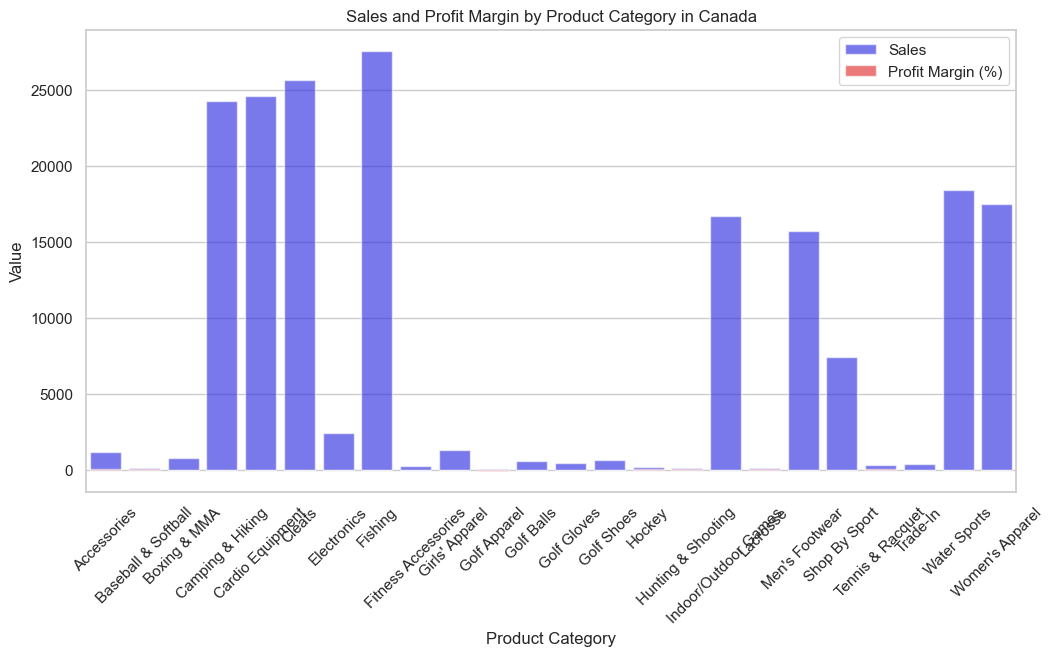

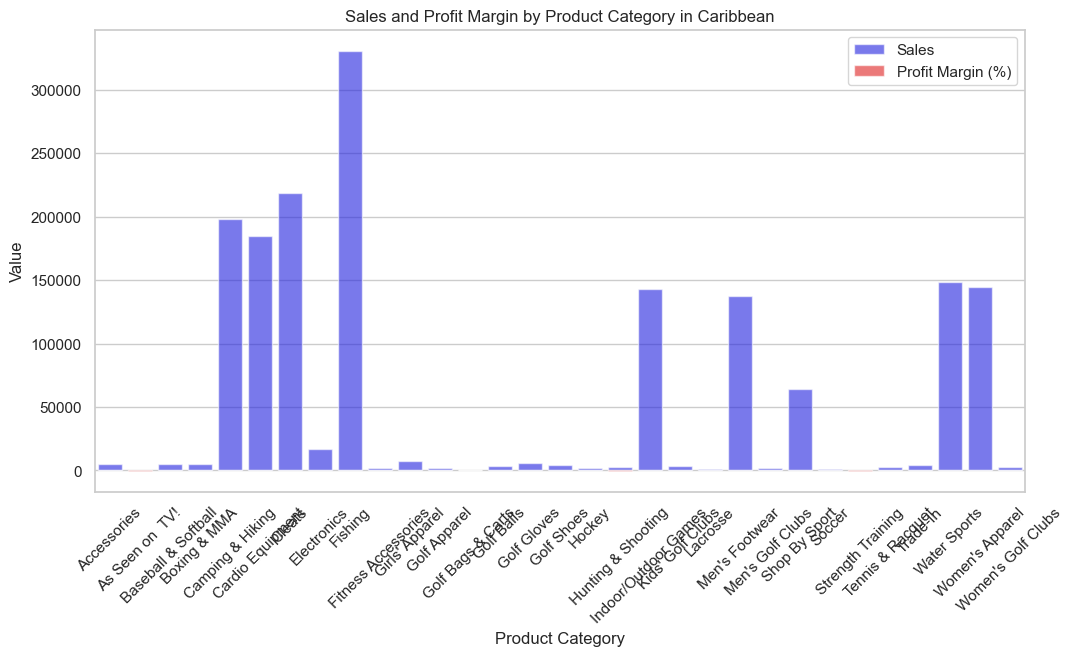

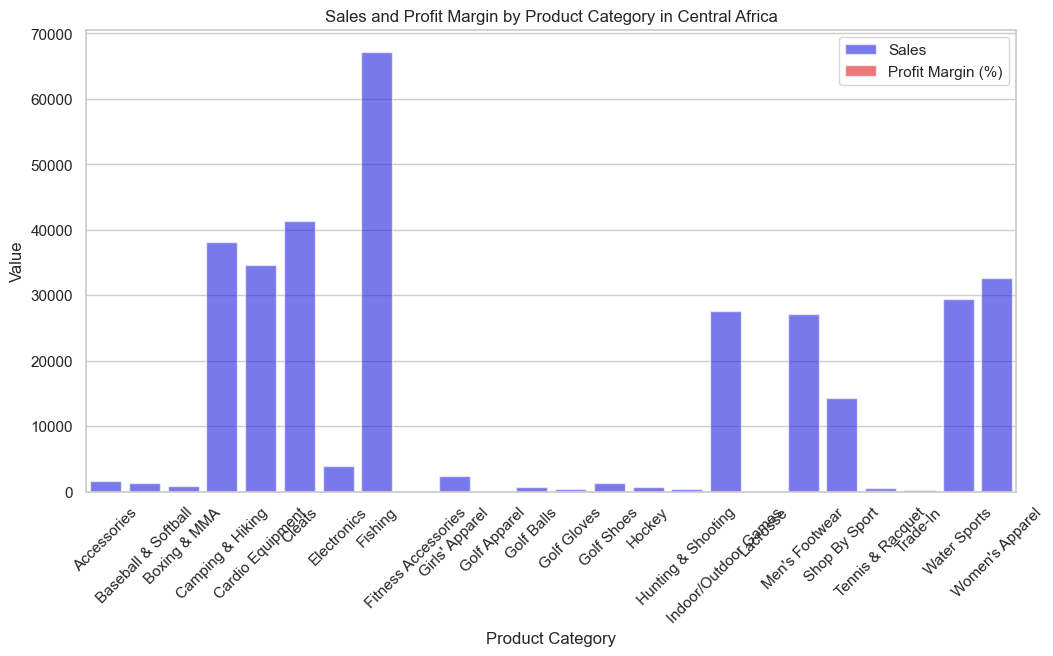

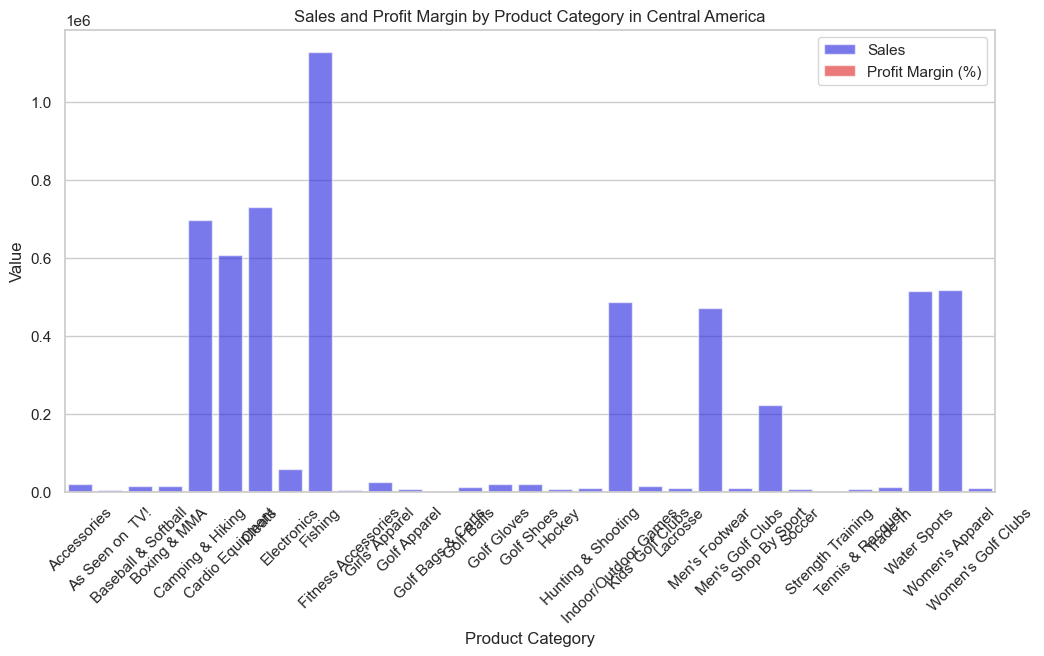

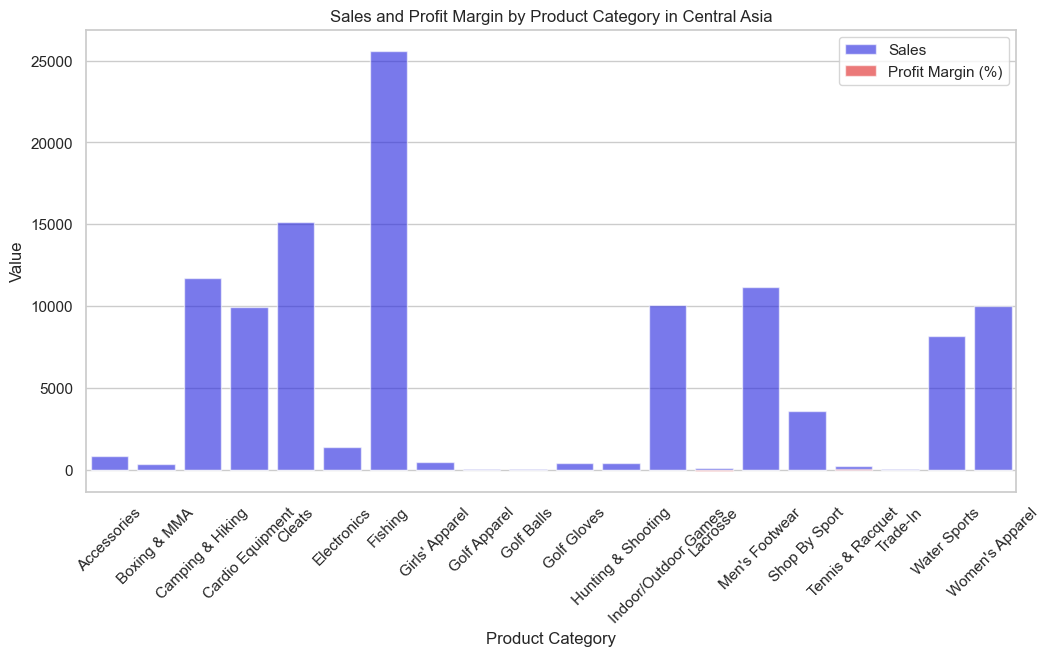

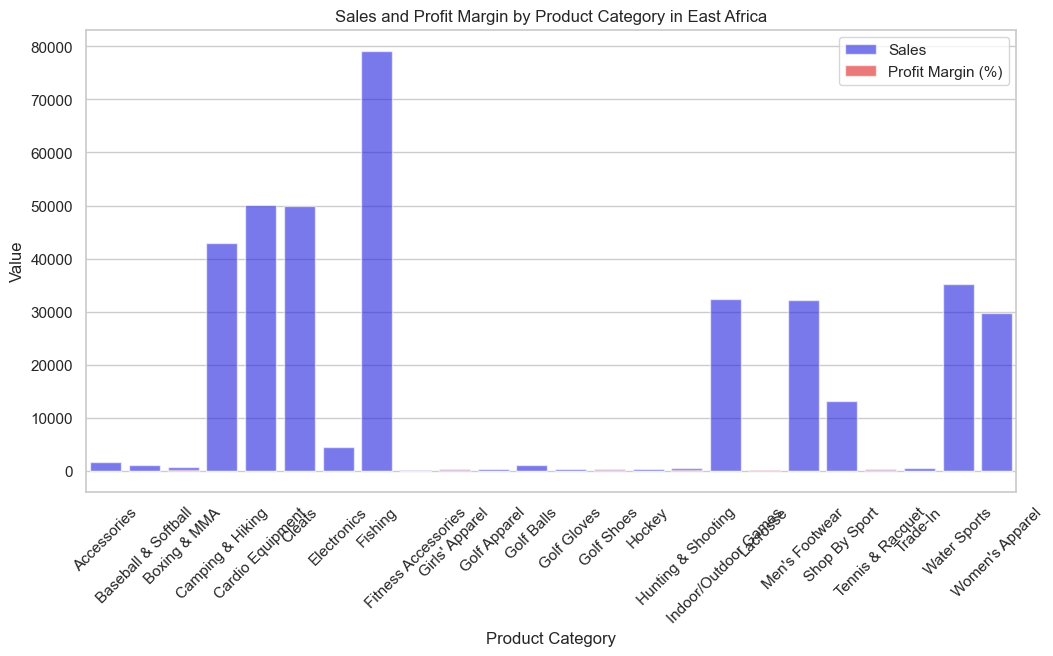

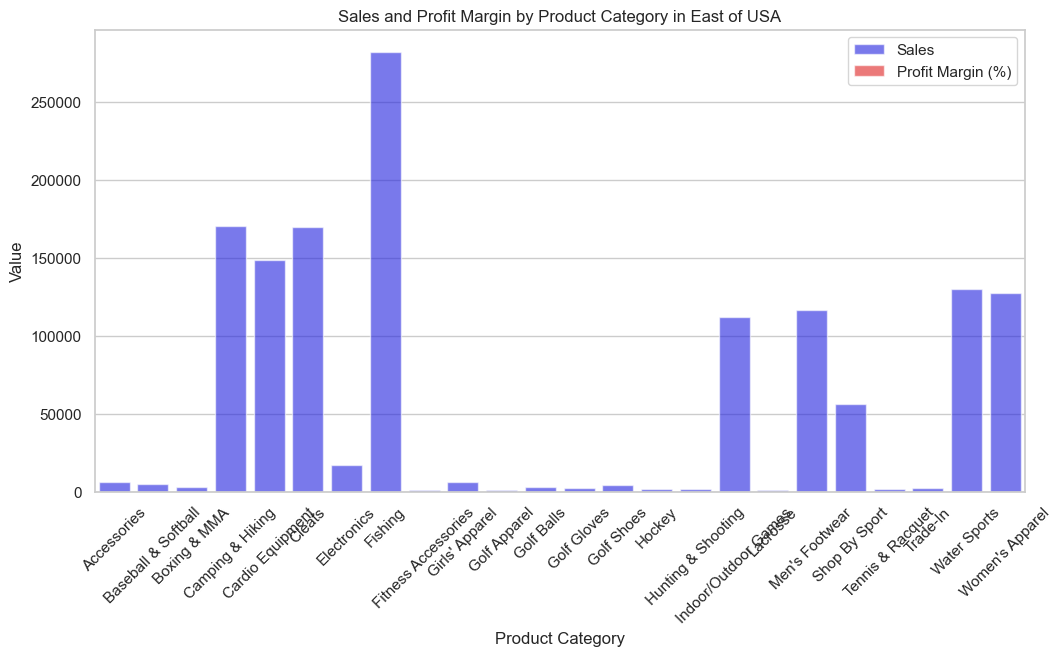

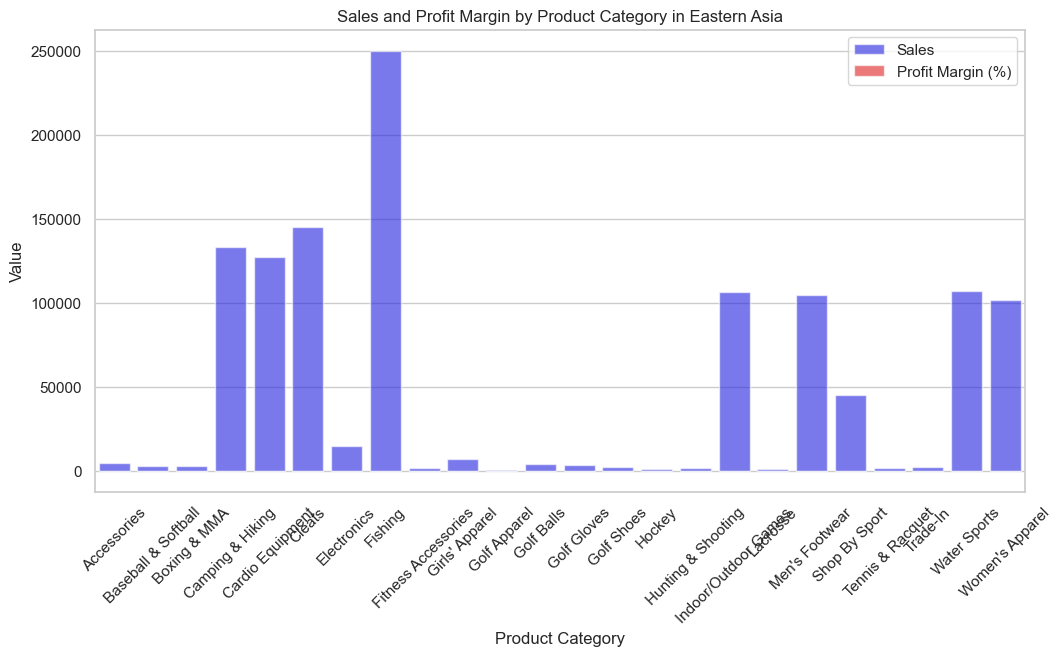

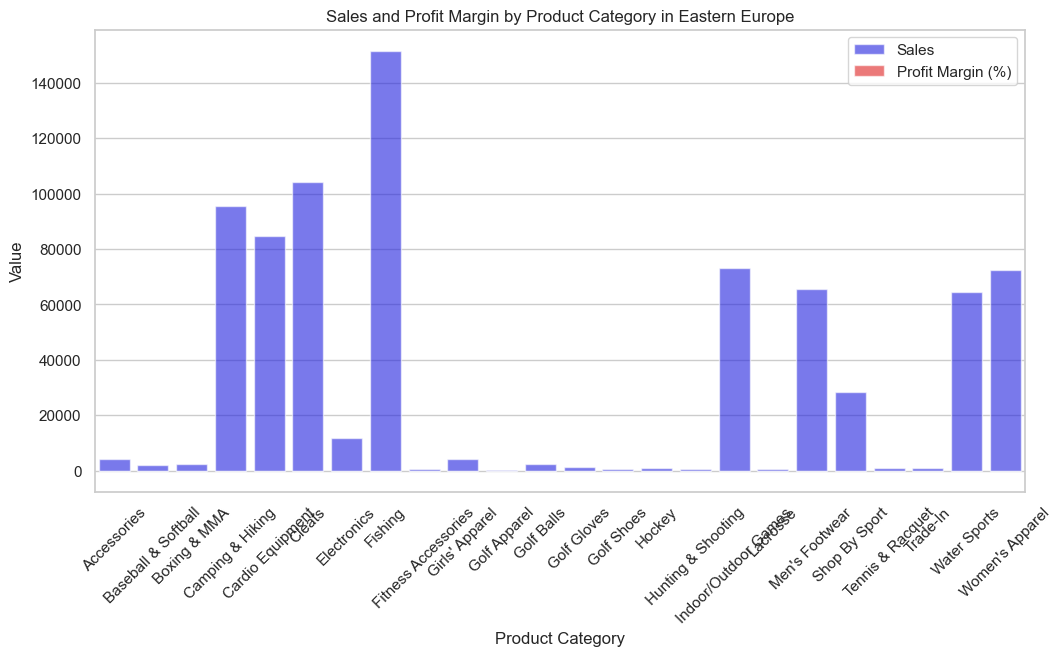

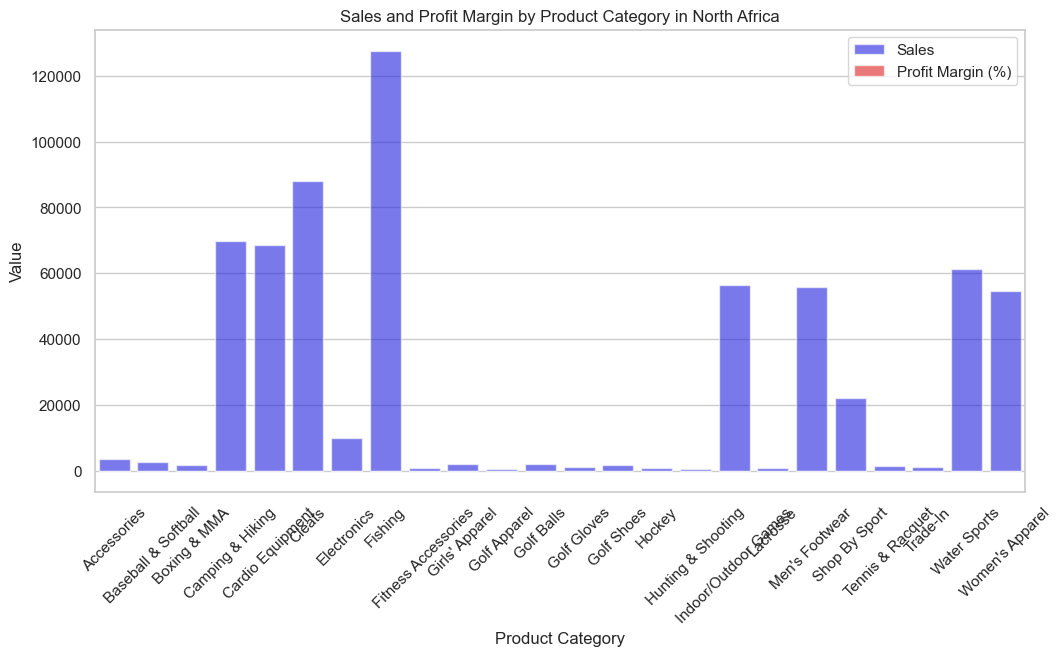

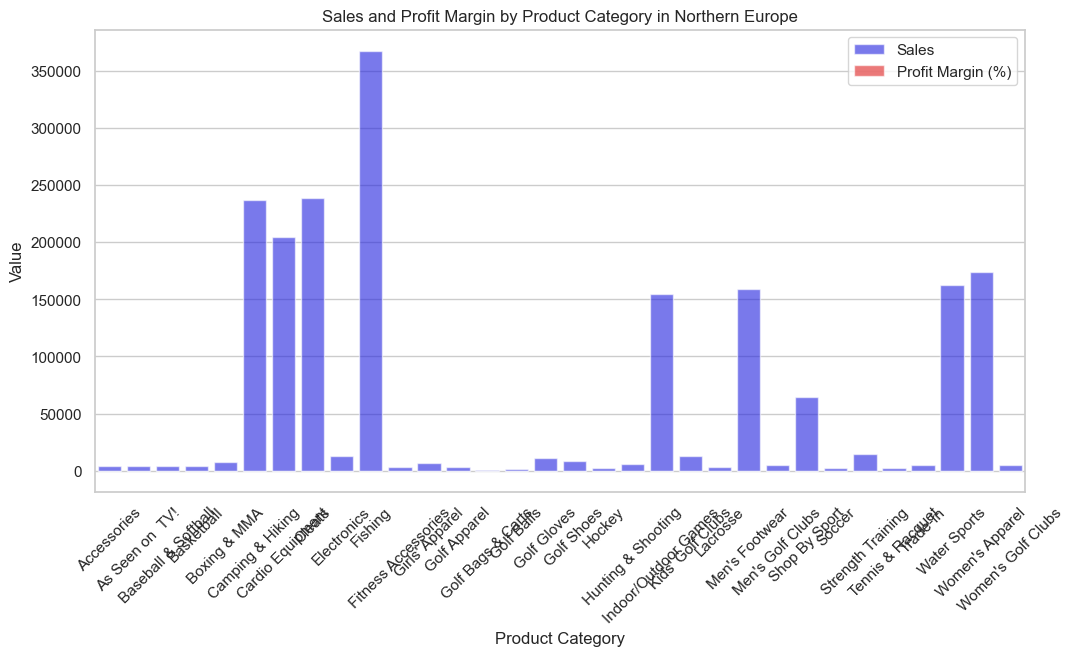

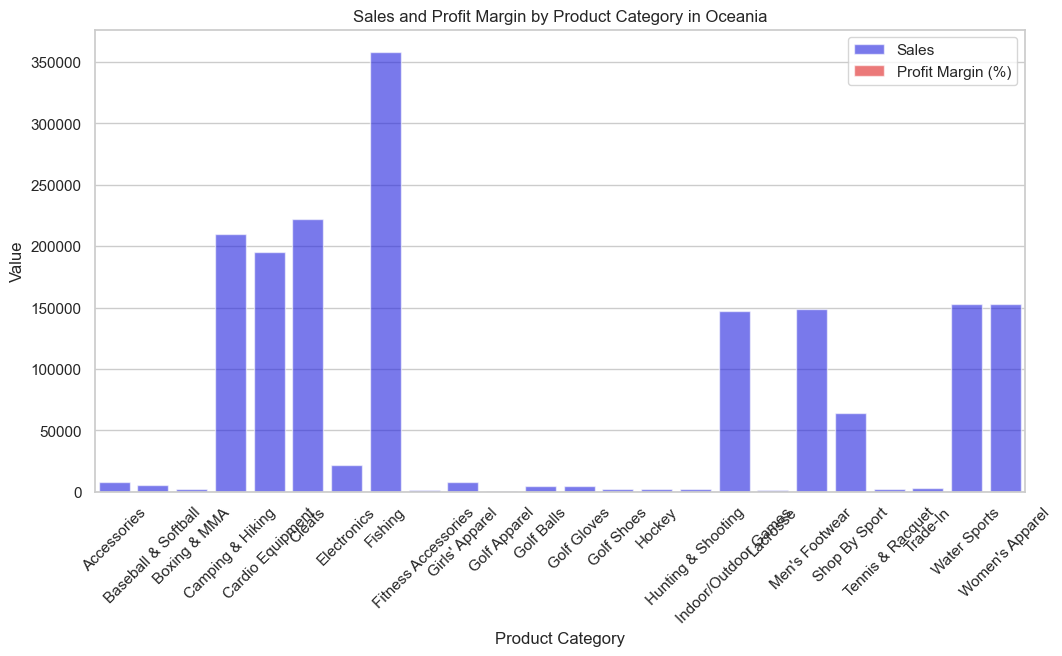

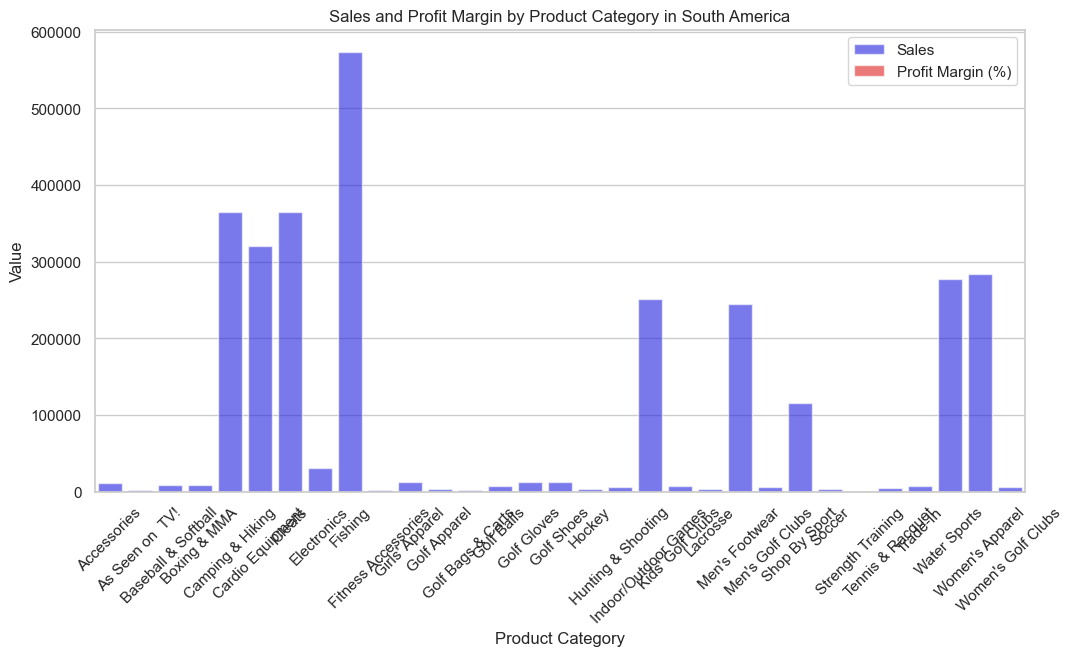

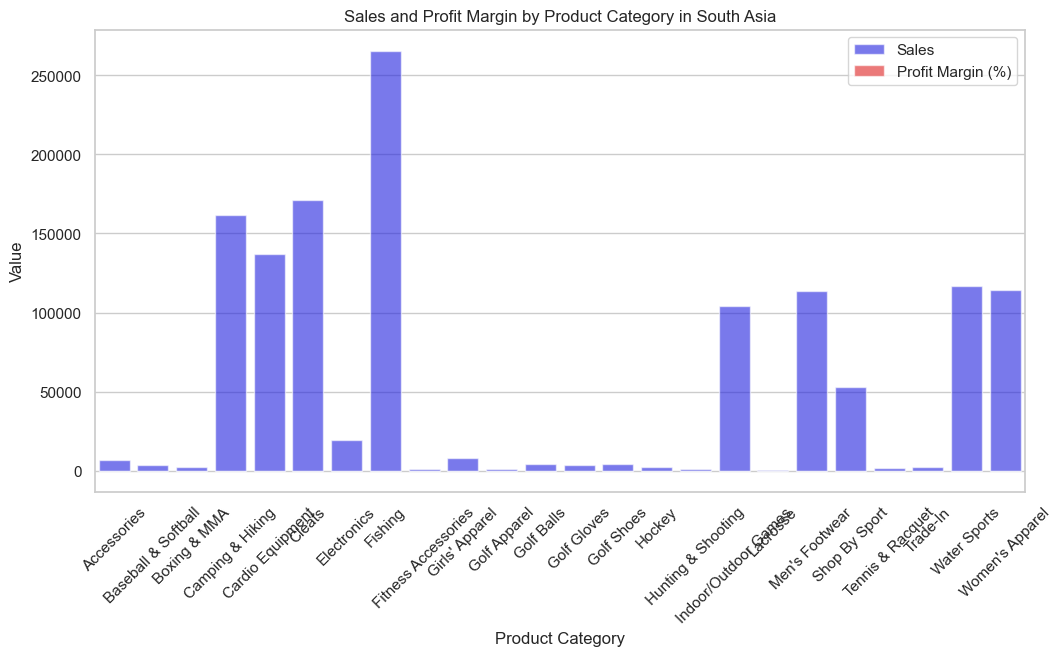

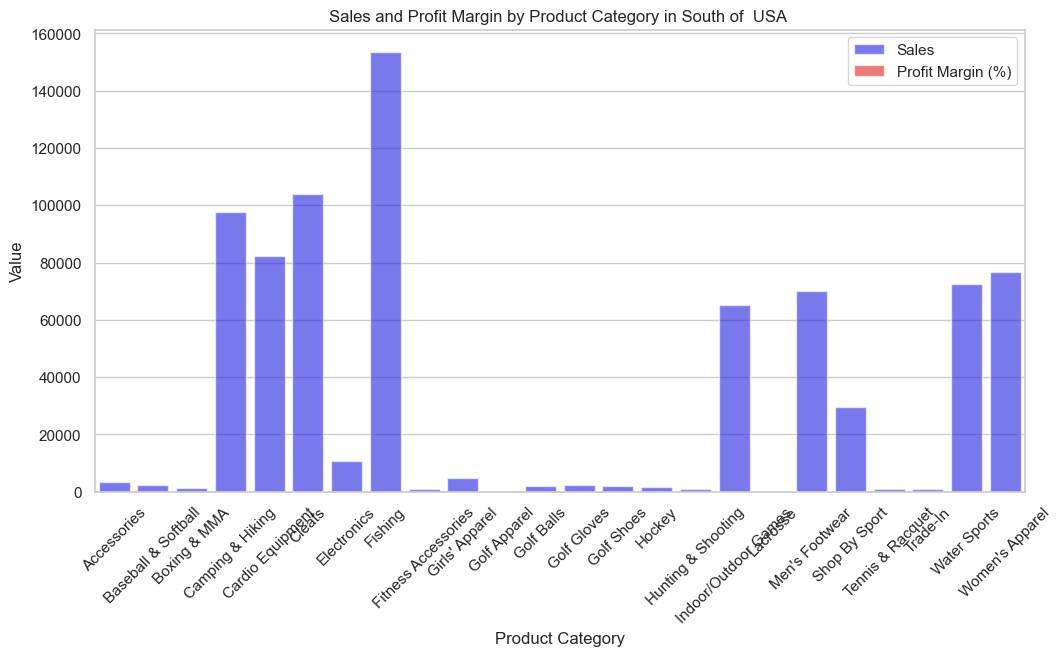

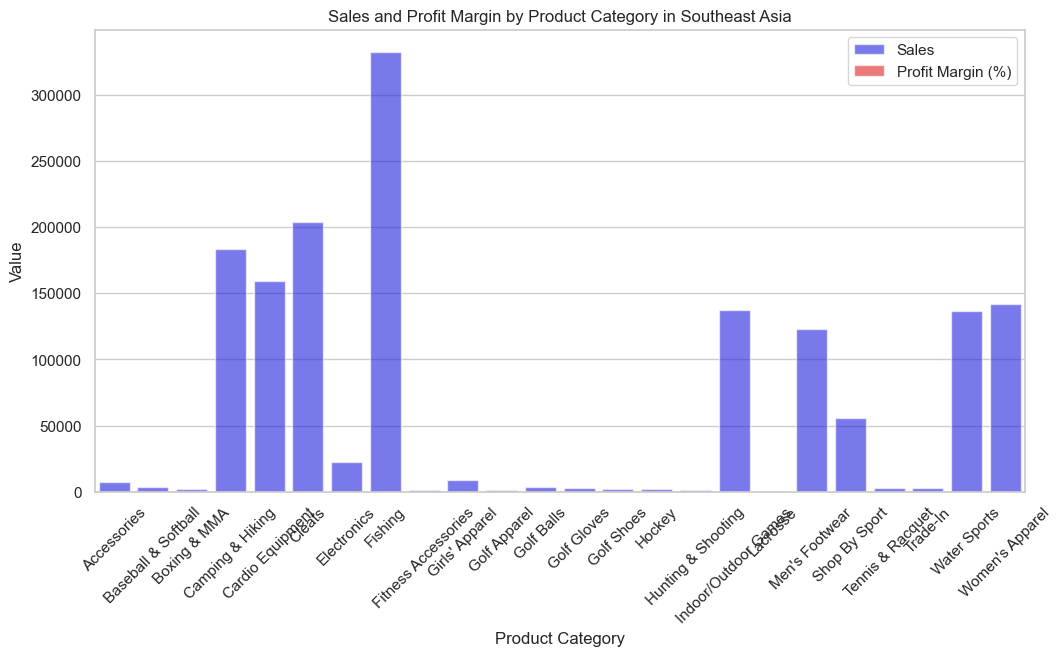

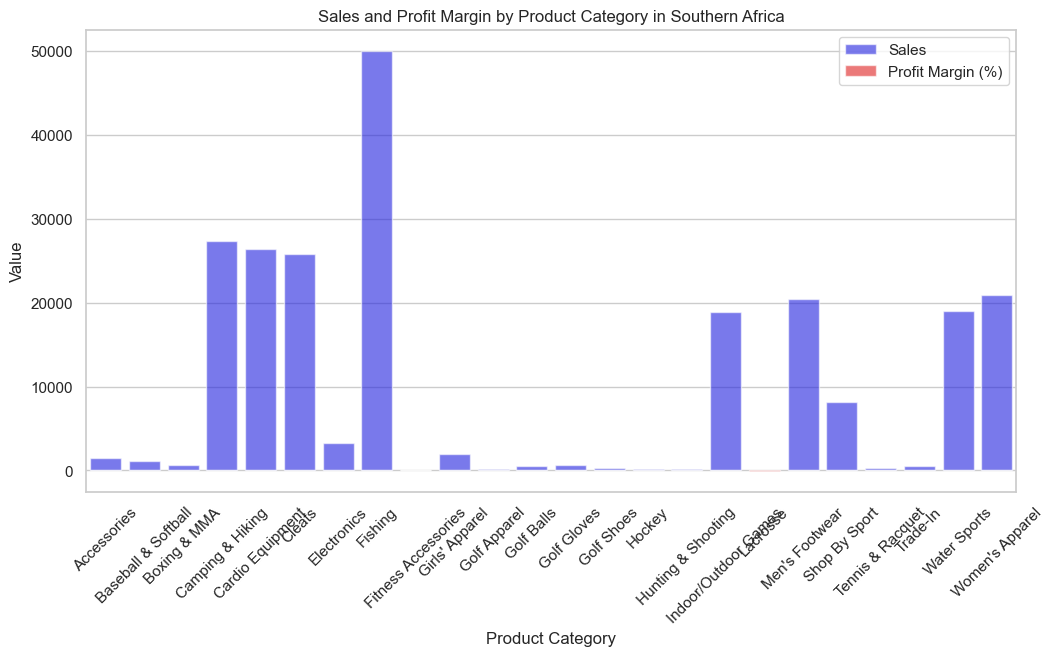

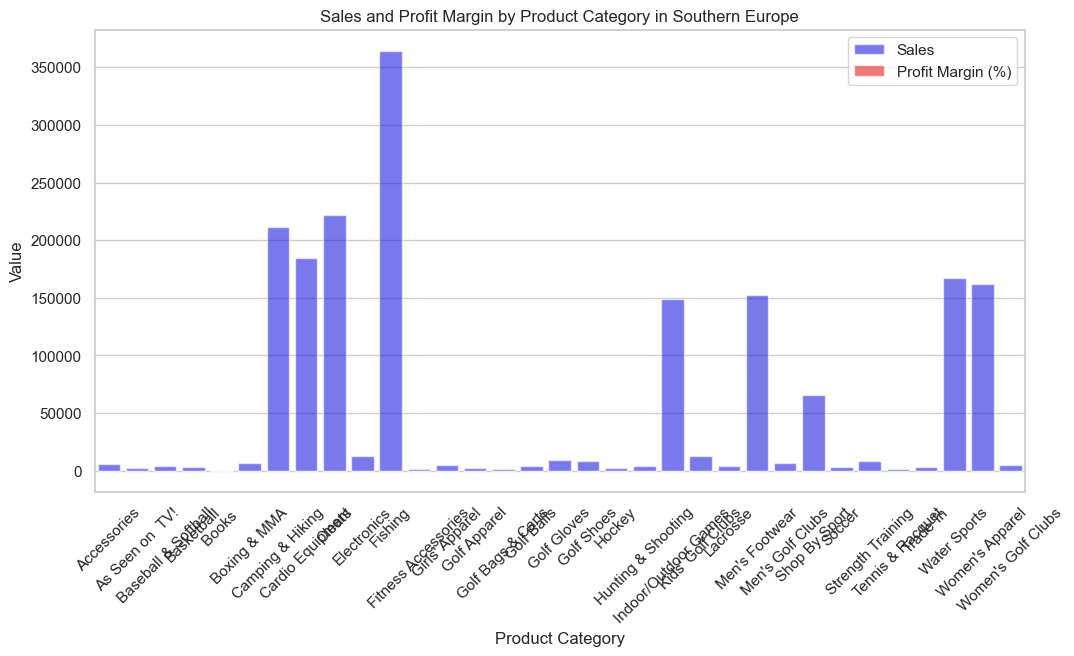

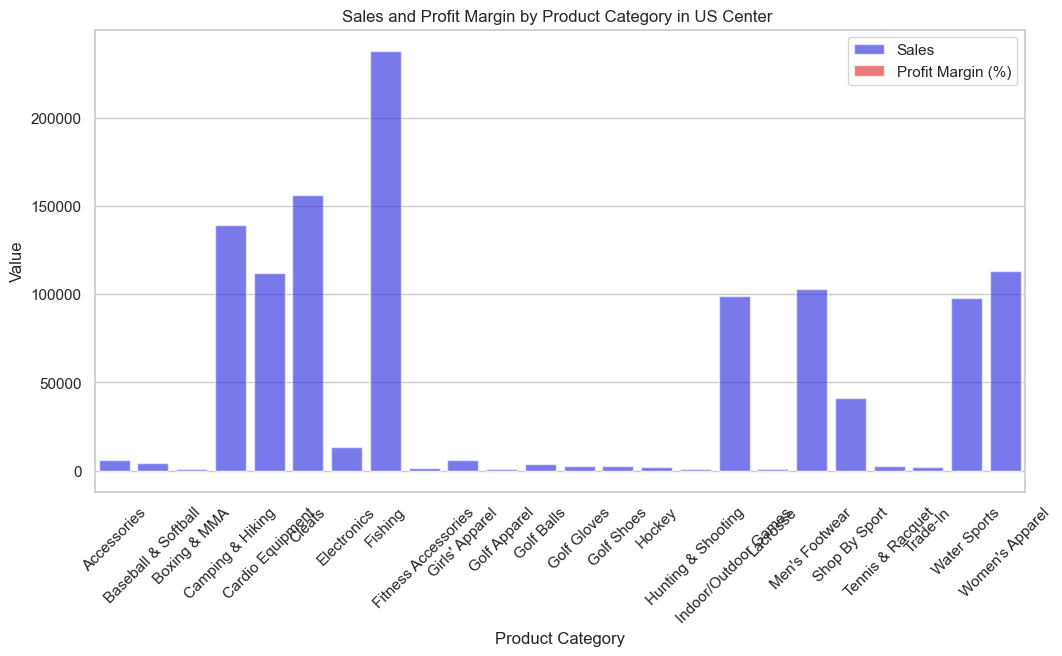

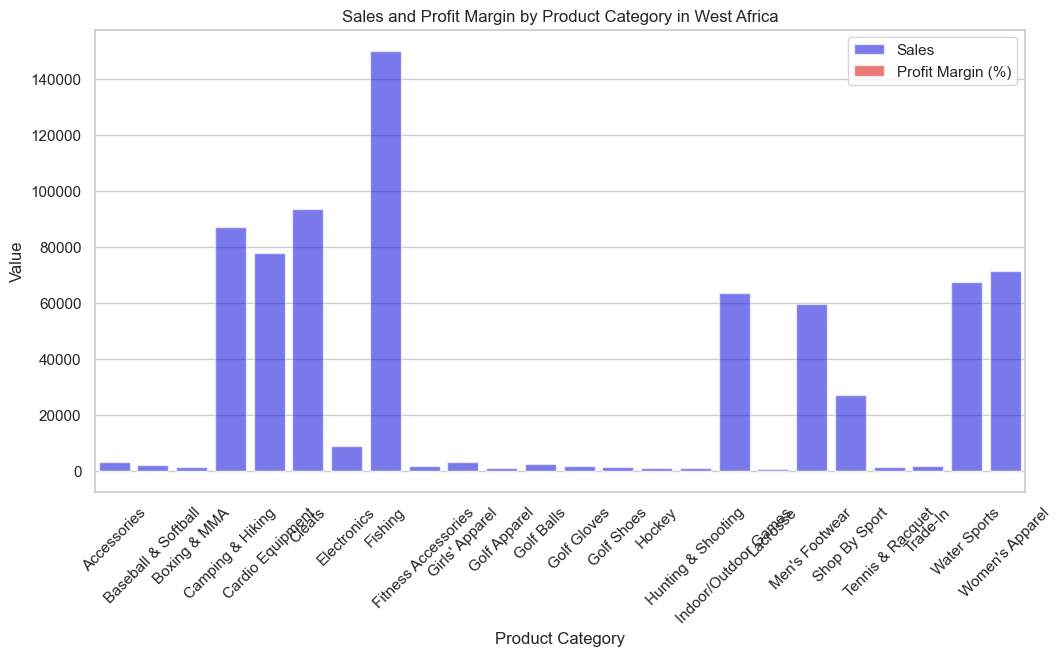

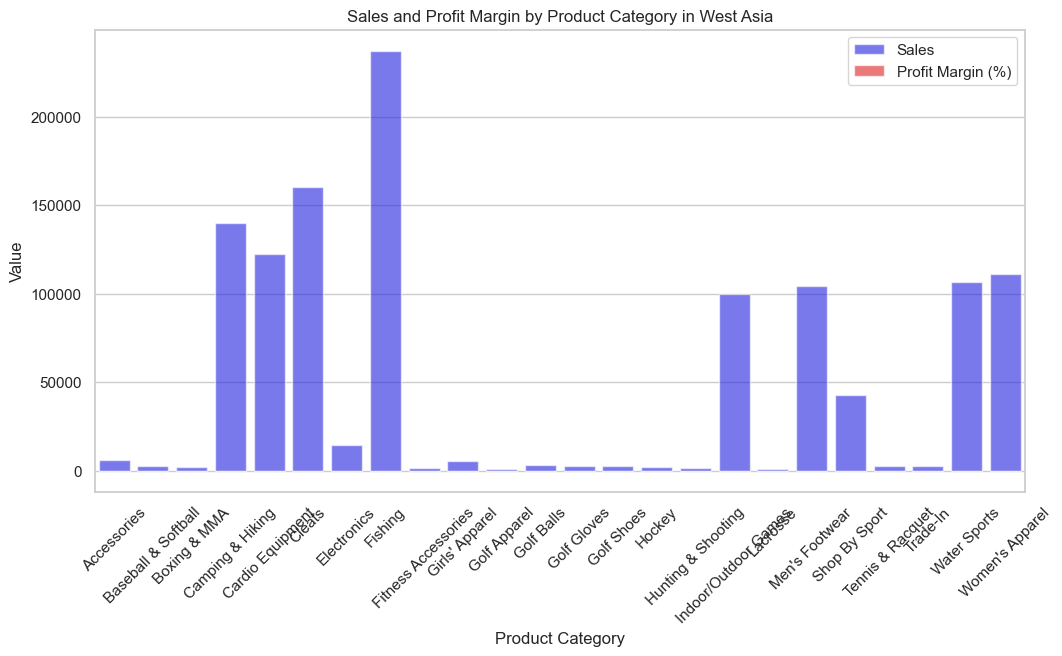

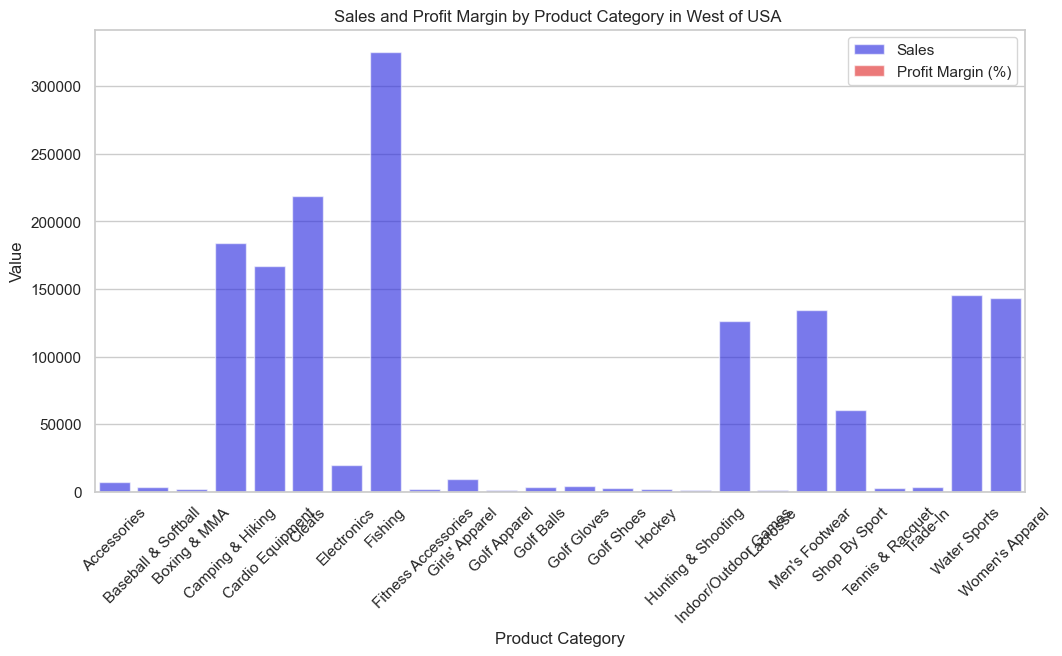

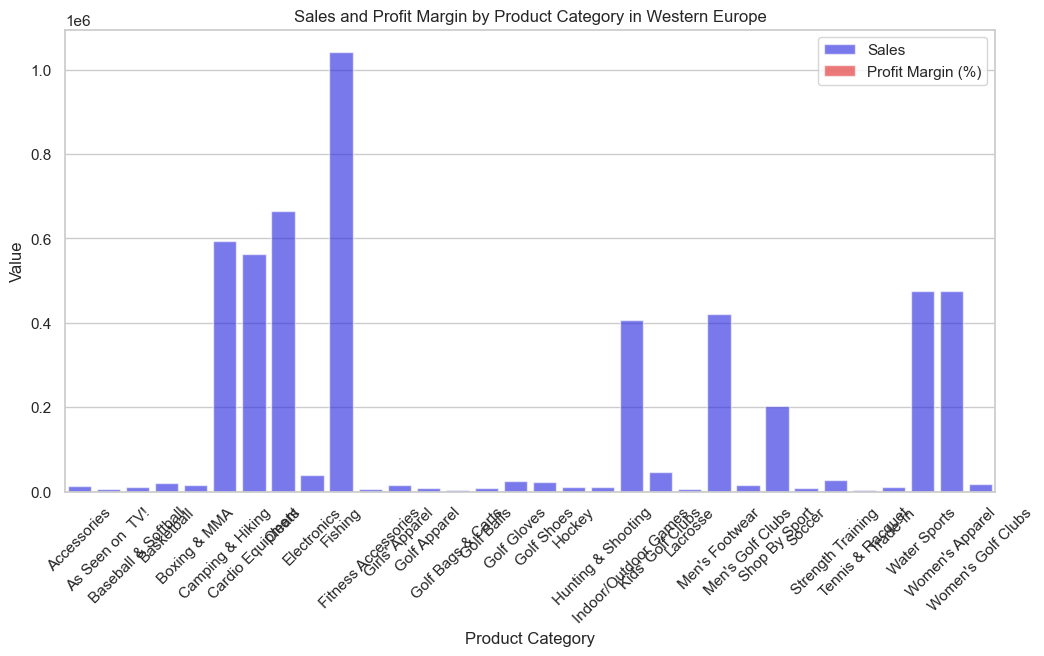

In [38]:
unique_regions = category_region_sales_profit['Order Region'].unique()

# 각 지역별 차트 생성
for region in unique_regions:
    region_data = category_region_sales_profit[category_region_sales_profit['Order Region'] == region]
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(data=region_data, x='Category Name', y='Sales', color='blue', alpha=0.6, label='Sales')
    bar_plot = sns.barplot(data=region_data, x='Category Name', y='Profit Margin (%)', color='red', alpha=0.6, label='Profit Margin (%)')
    plt.title(f'Sales and Profit Margin by Product Category in {region}')
    plt.xlabel('Product Category')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

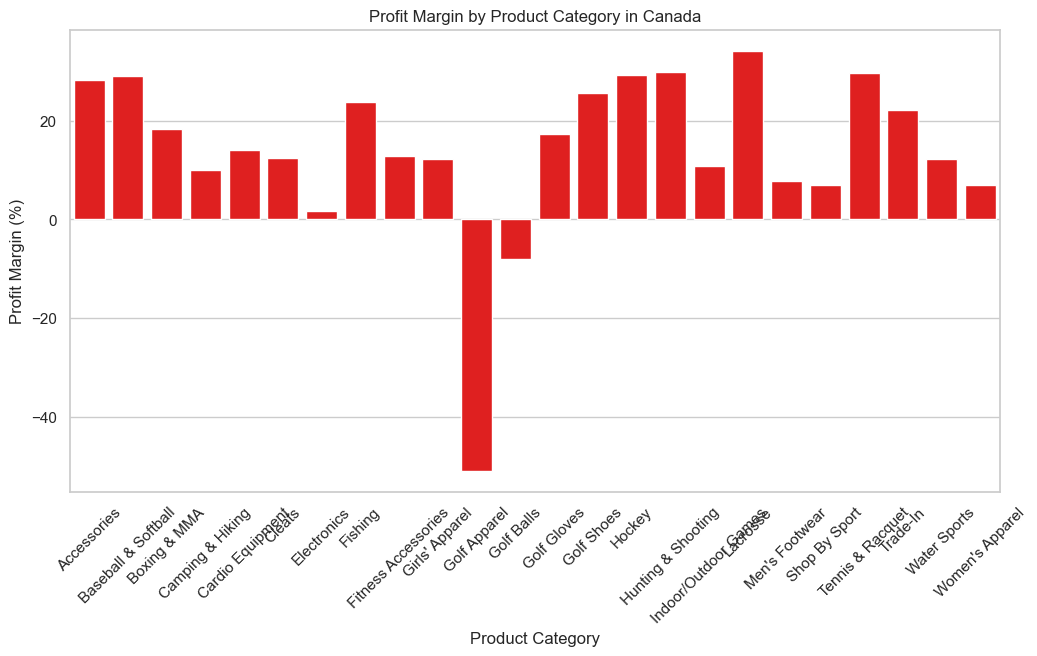

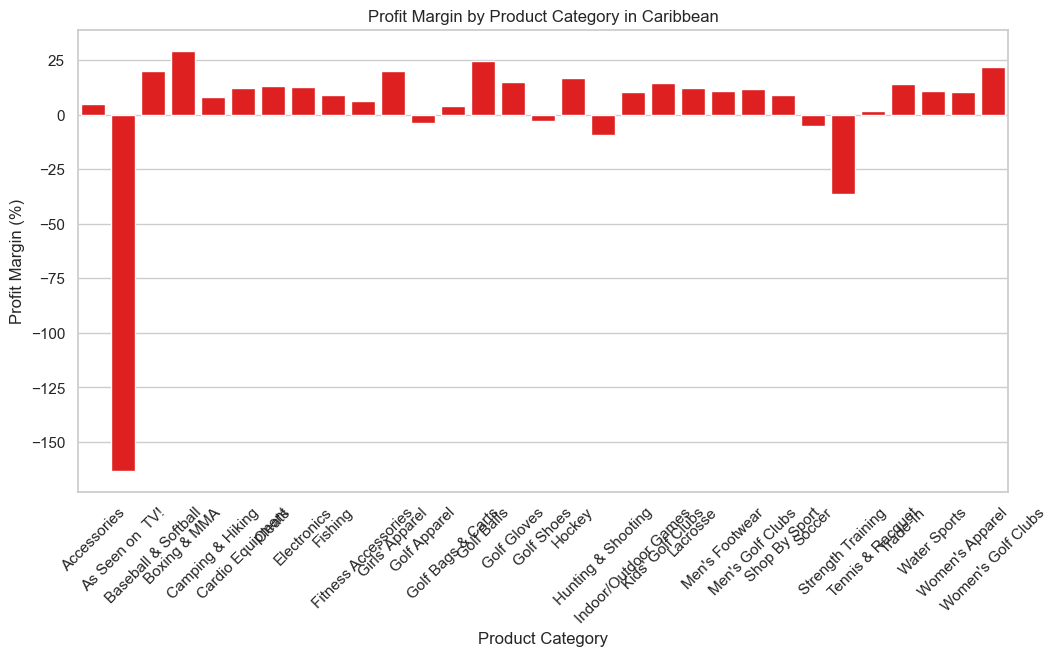

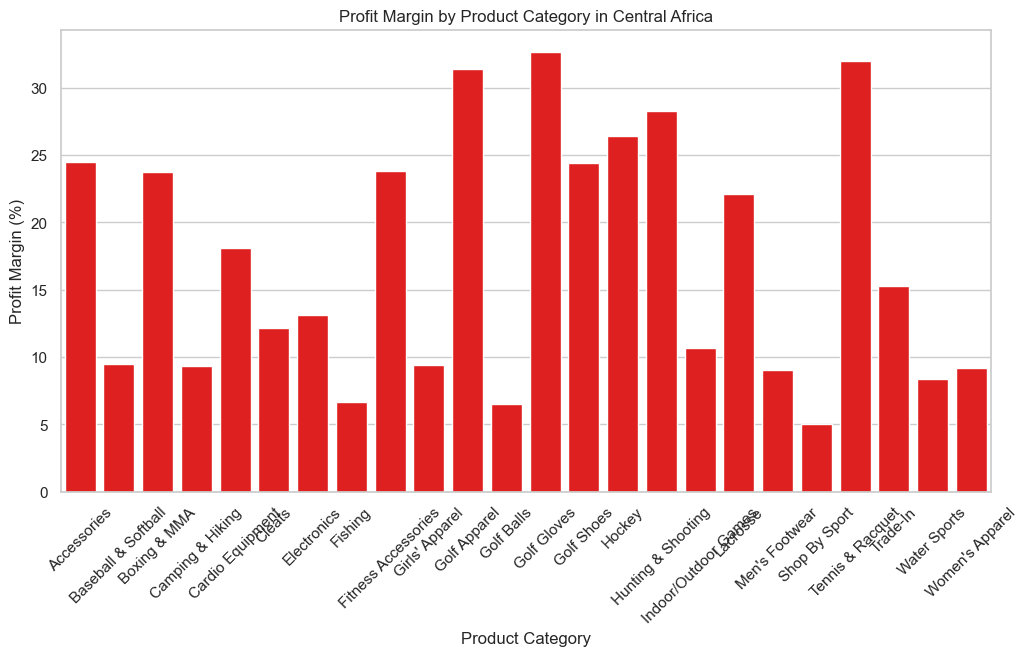

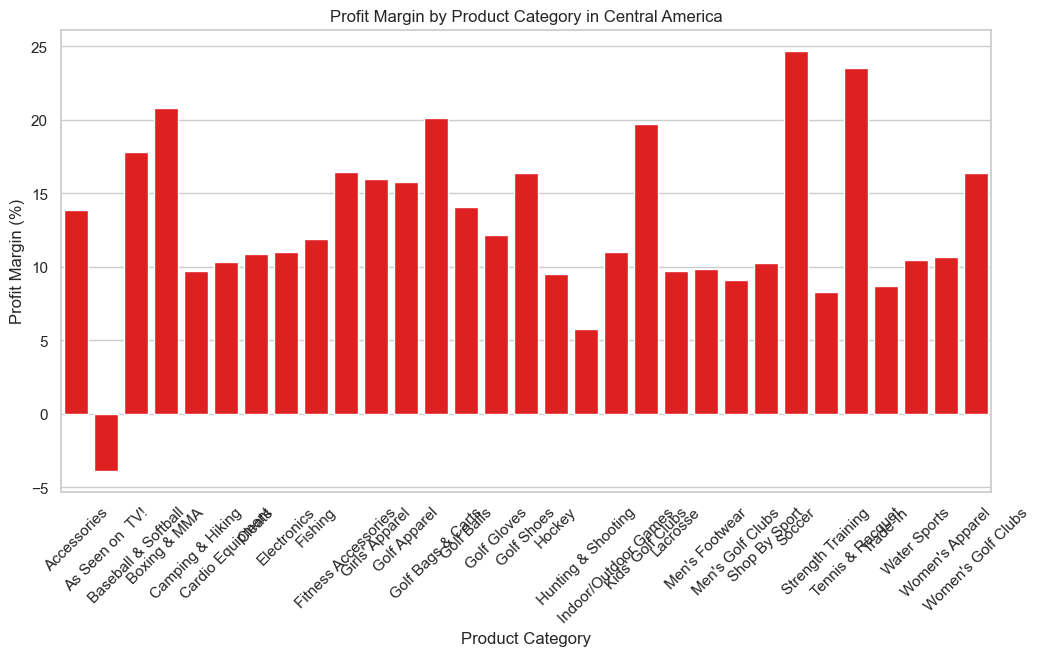

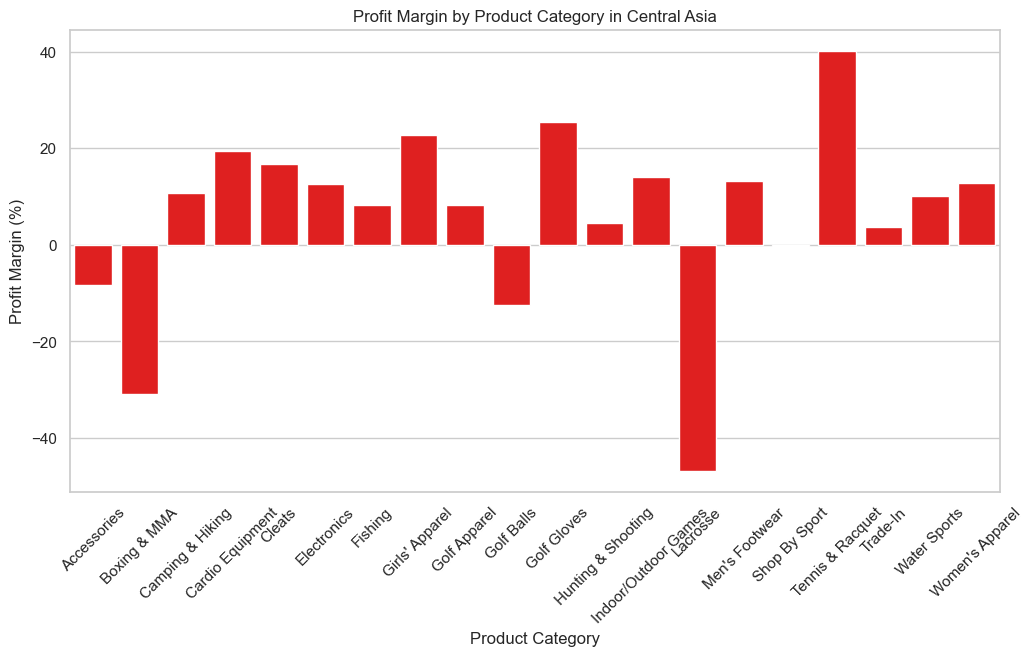

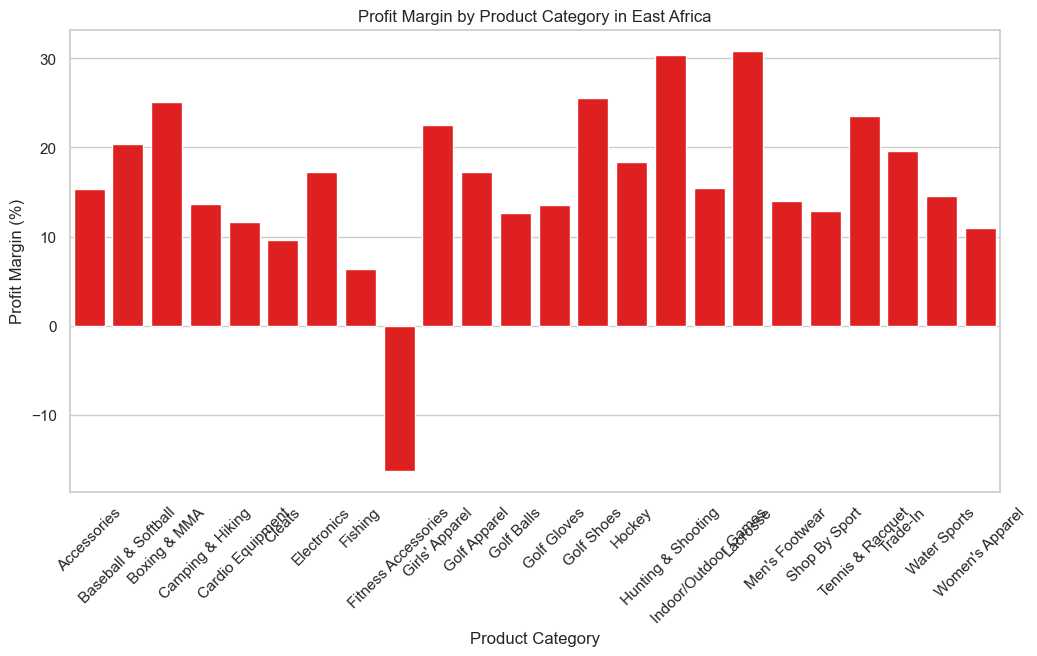

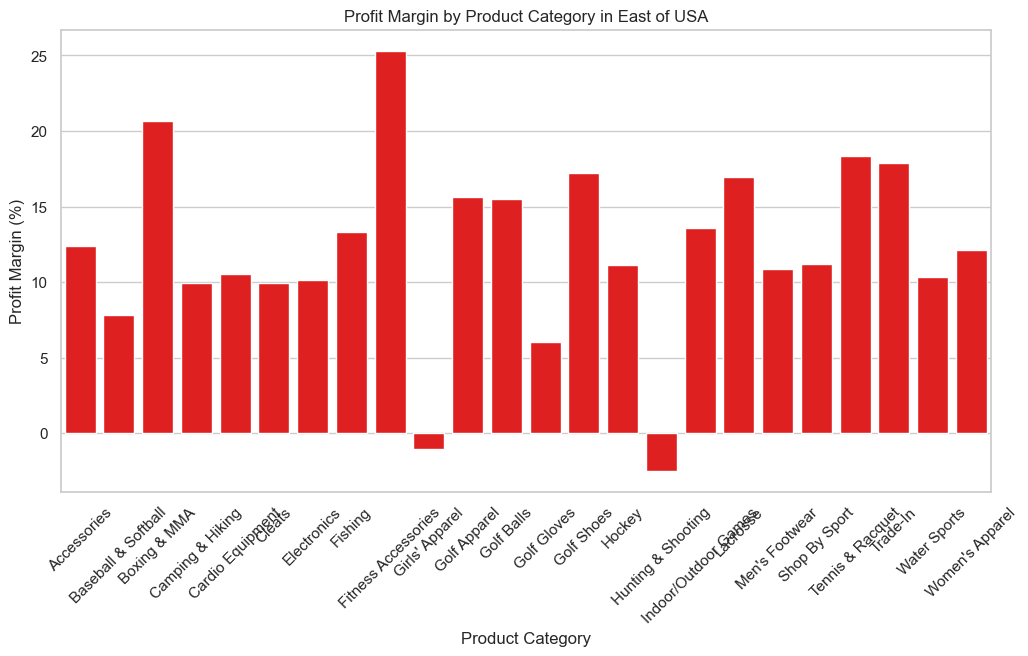

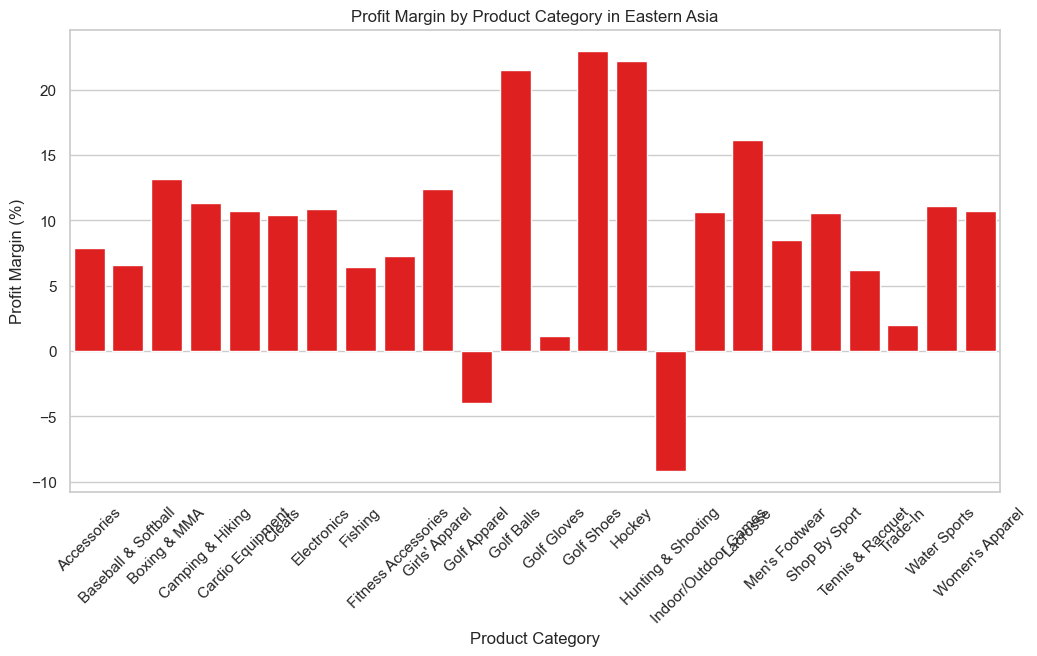

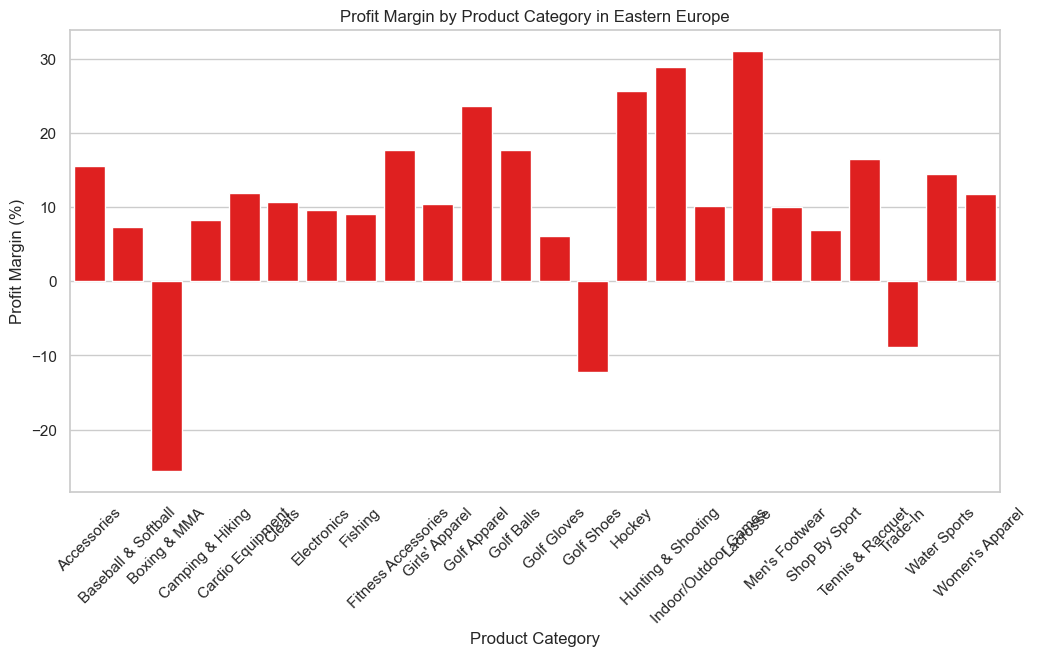

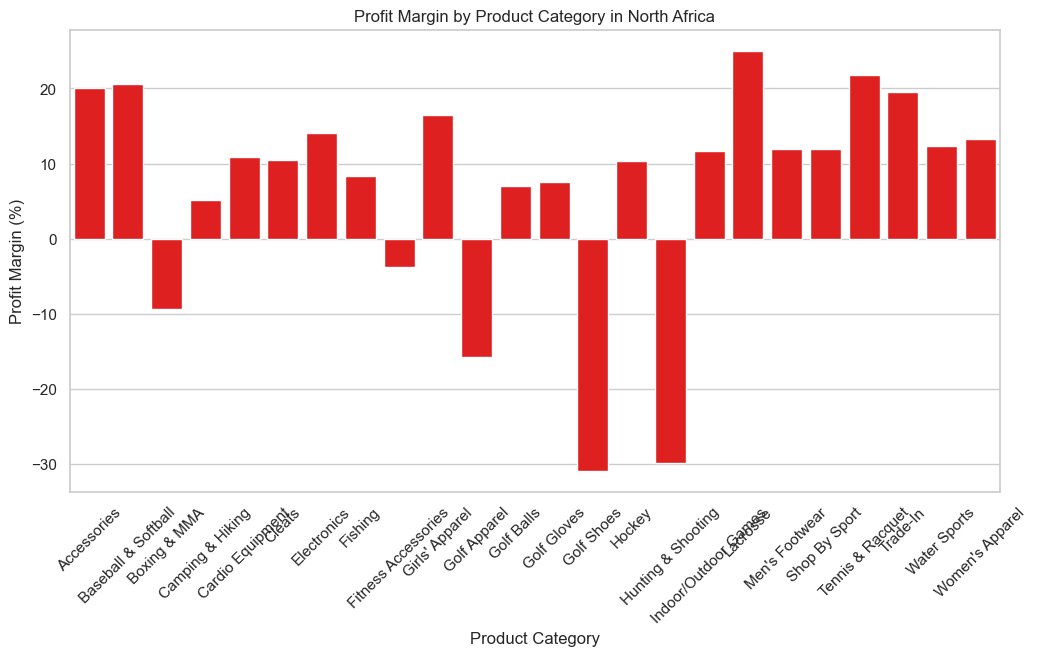

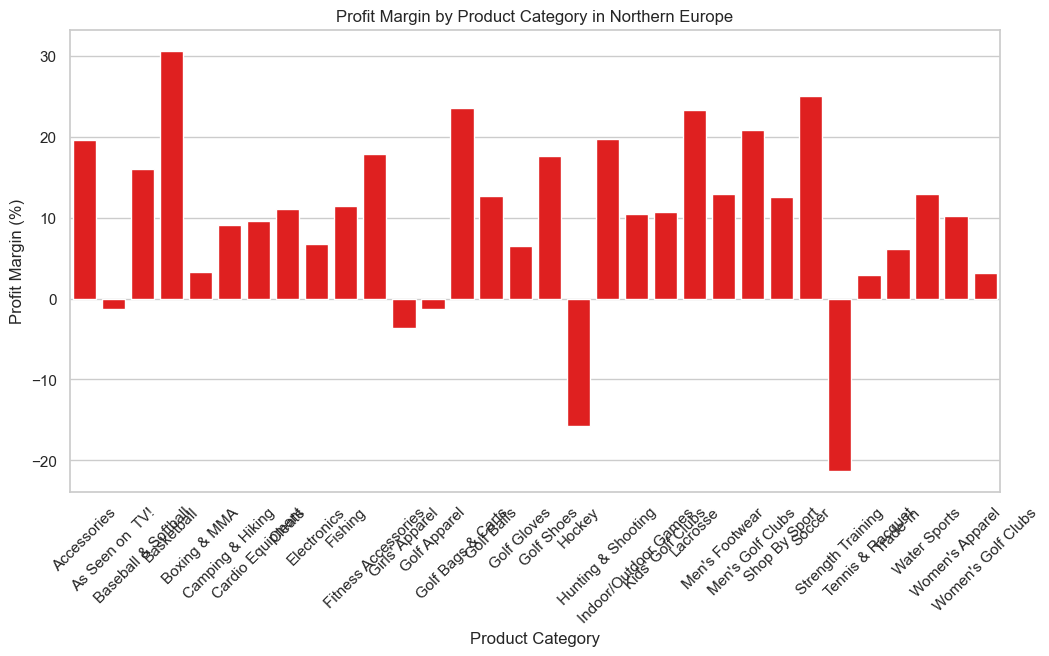

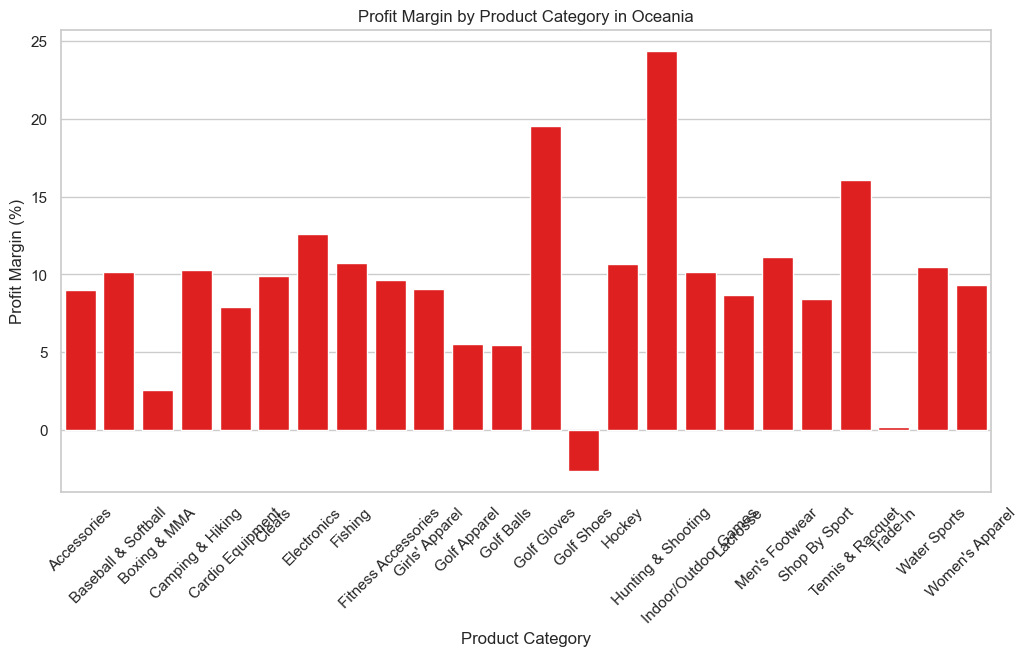

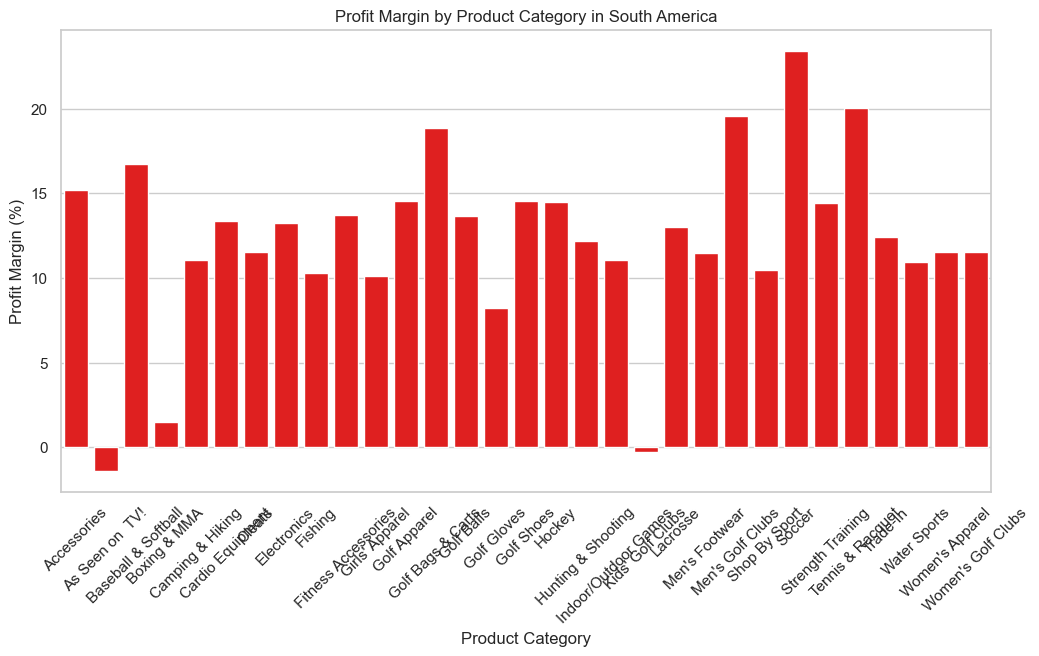

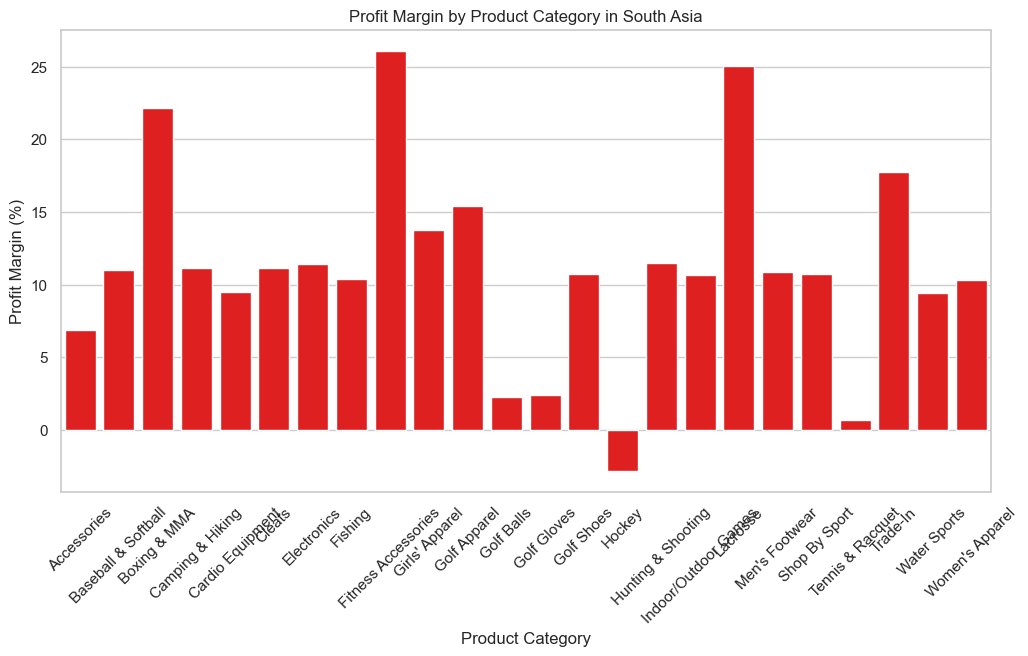

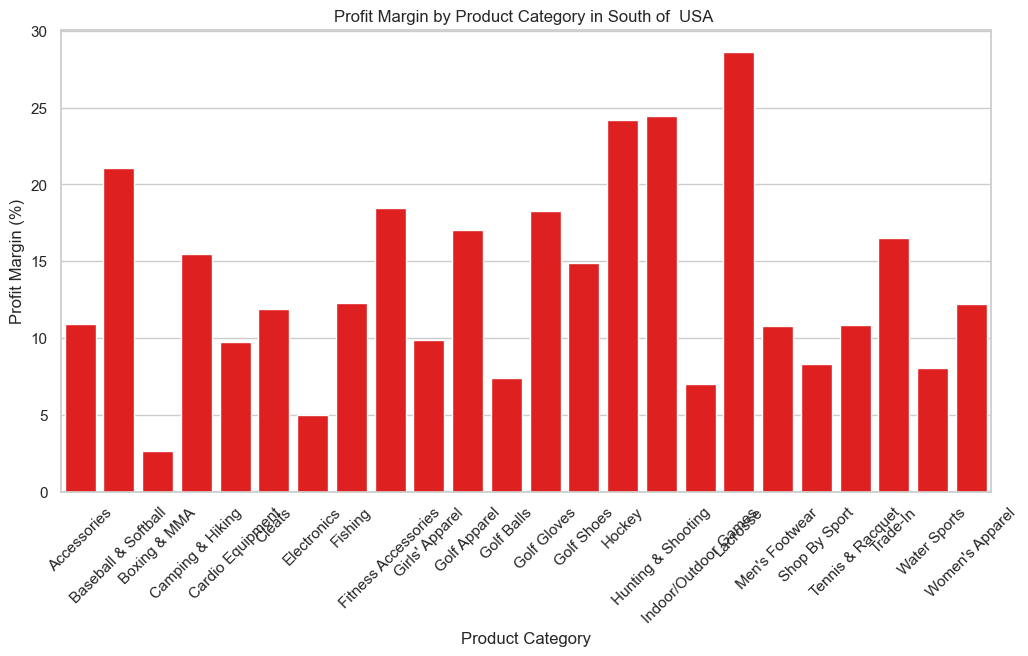

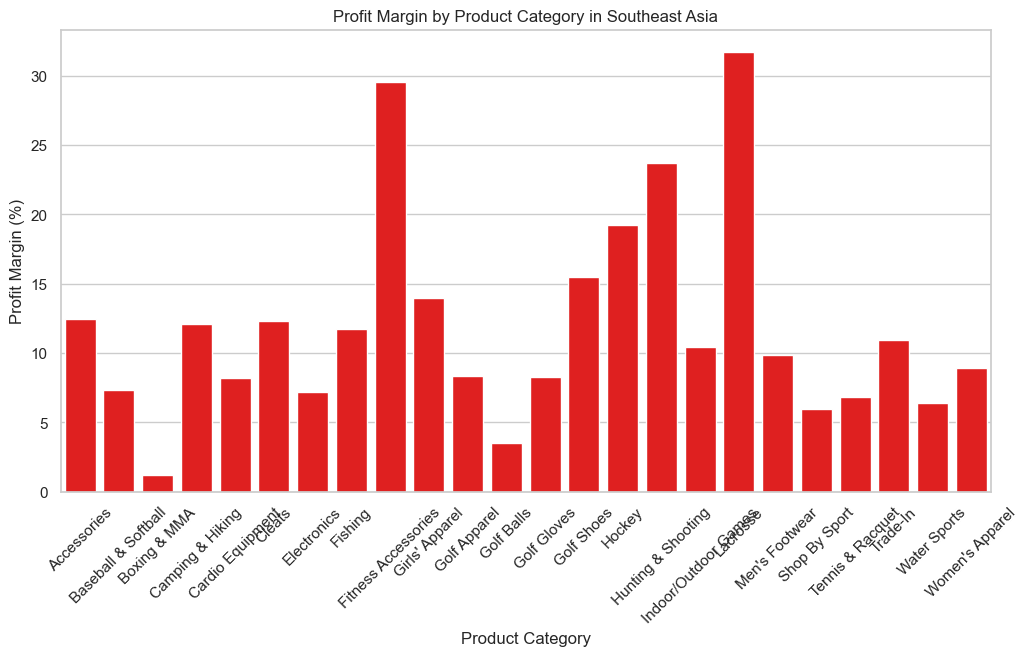

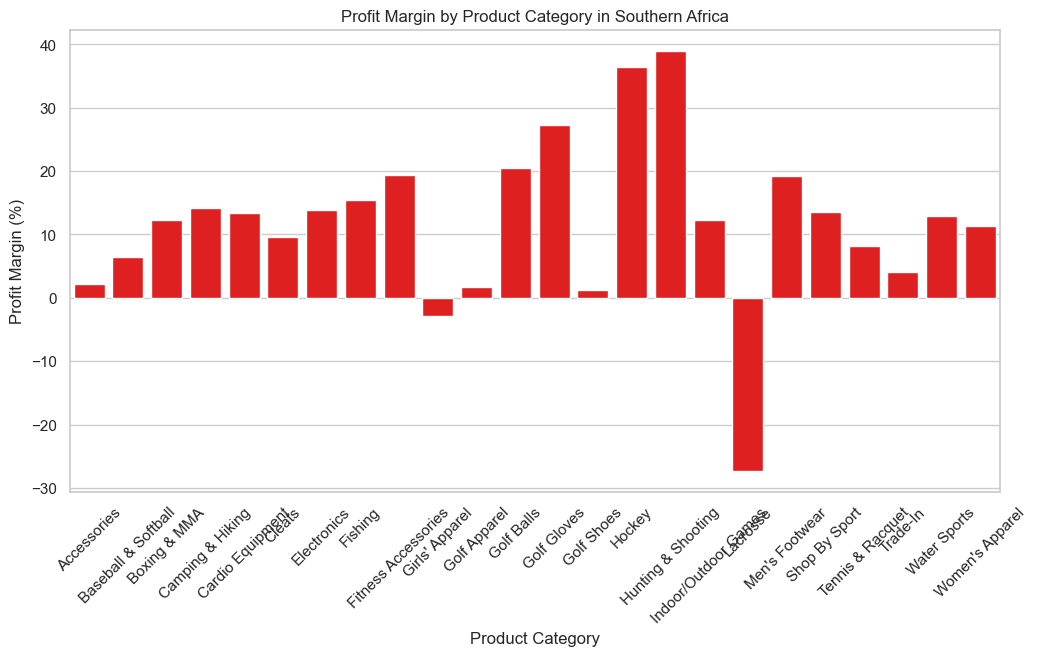

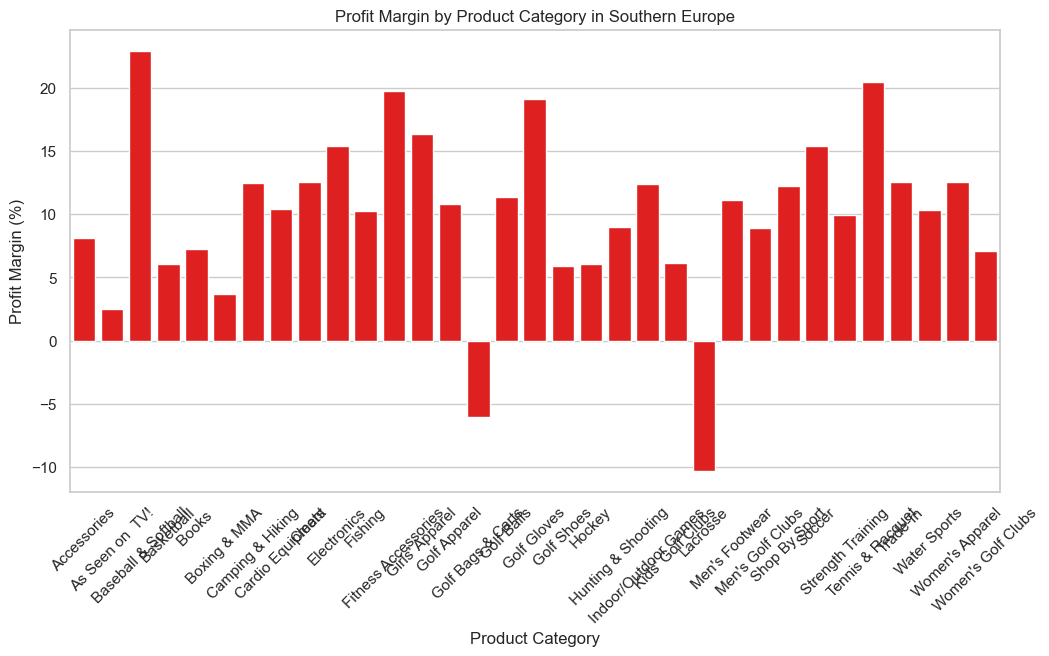

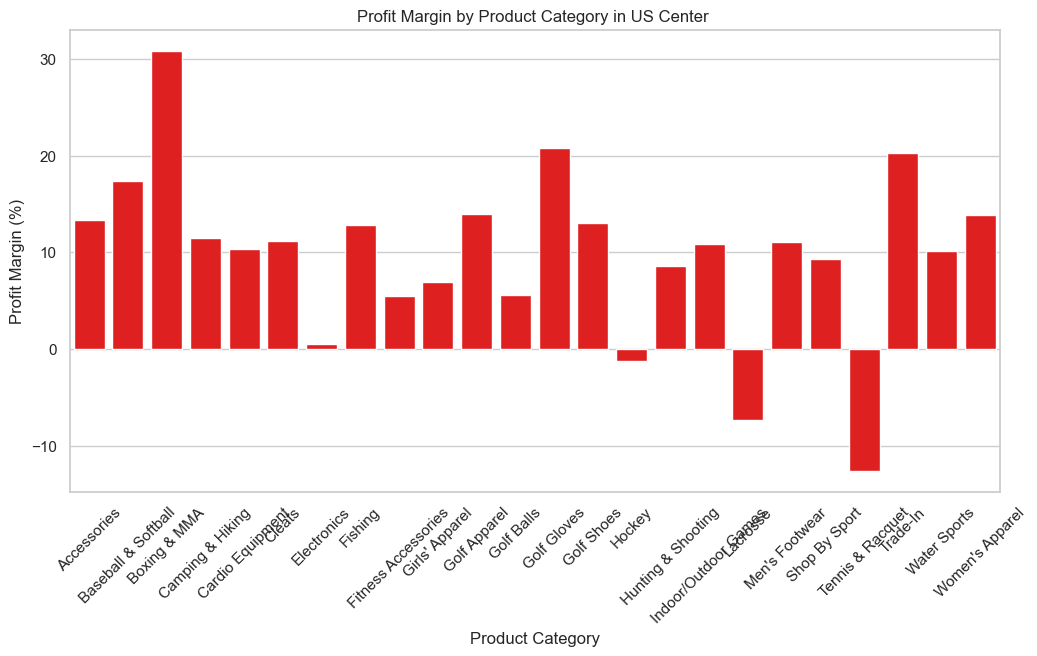

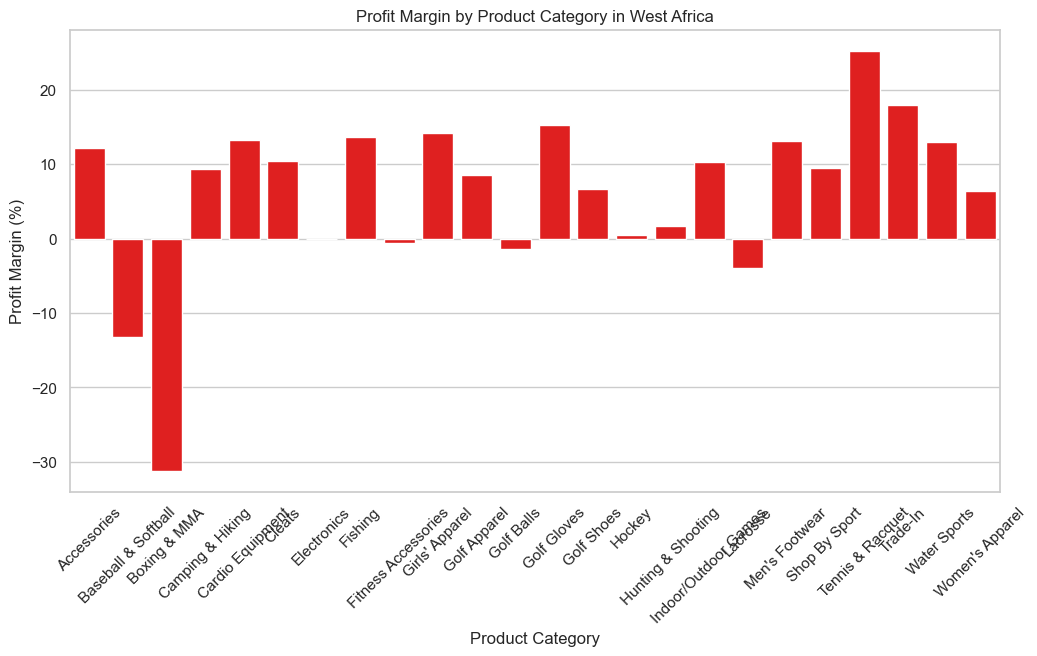

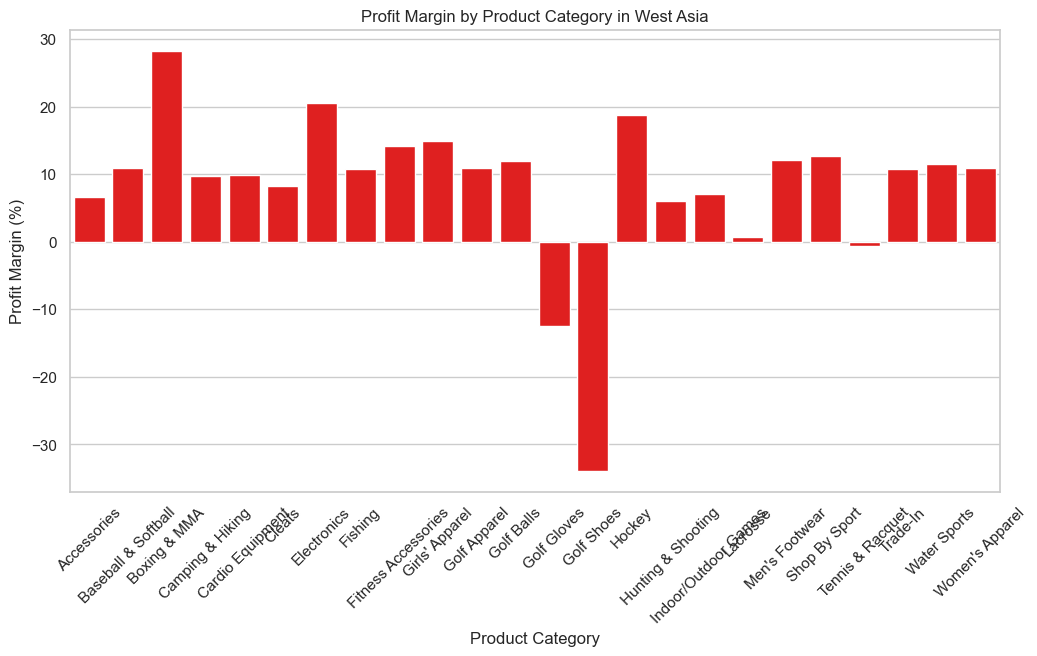

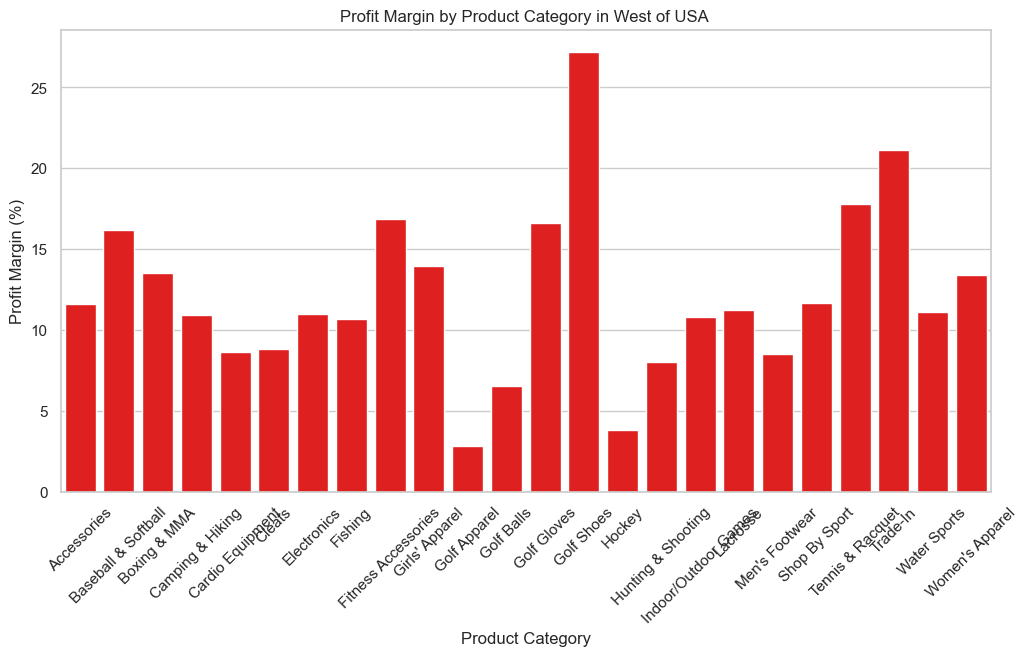

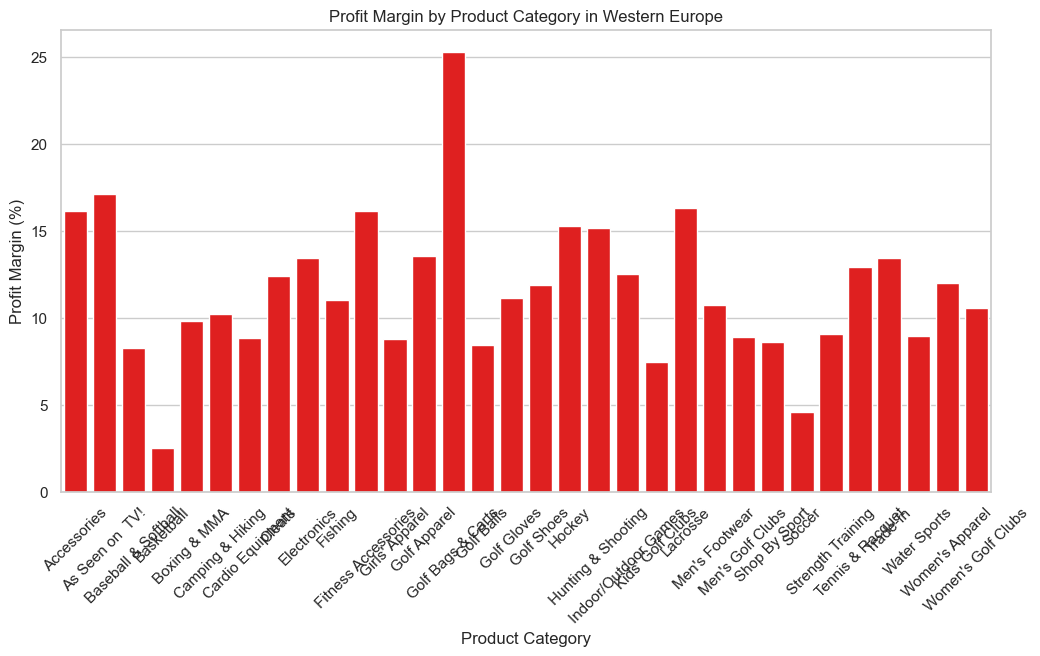

In [39]:

for region in unique_regions:
    region_data = category_region_sales_profit[category_region_sales_profit['Order Region'] == region]
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(data=region_data, x='Category Name', y='Profit Margin (%)', color='red')
    plt.title(f'Profit Margin by Product Category in {region}')
    plt.xlabel('Product Category')
    plt.ylabel('Profit Margin (%)')
    plt.xticks(rotation=45)
    plt.show()

In [40]:
top_categories_by_region_sorted = top_categories_by_region.sort_values(by='Profit Margin (%)', ascending=False)
distinctive_regions = top_categories_by_region_sorted.head(5)

distinctive_regions

Order Region       Category Name       Sales  Order Profit Per Order  \
126     Central Asia    Tennis & Racquet  224.949997               90.379997   
424  Southern Africa  Hunting & Shooting  149.949997               58.500000   
17            Canada            Lacrosse  124.949997               42.730000   
67    Central Africa         Golf Gloves  424.830000              138.850002   
402   Southeast Asia            Lacrosse  774.689993              245.870002   

     Profit Margin (%)  
126          40.177817  
424          39.013005  
17           34.197680  
67           32.683662  
402          31.737857

Central Asia (Tennis & Racquet) : 이익률 40.18%: 중앙아시아에서 테니스 및 라켓 스포츠 제품의 이익률이 높다. 이 지역에서는 스포츠에 대한 관심이 증가하고 있으며, 특히 테니스가 인기 있는 것으로 보임  
Southern Africa (Hunting & Shooting) - 이익률 39.01%: 남부 아프리카에서 사냥 및 총기 관련 제품의 이익률이 높다. 이는 야생 동물과 사냥 관련 관광이 활발한 지역적 특성 때문일 수 있음  
Canada (Lacrosse) - 이익률 34.20%: 캐나다에서는 라크로스 관련 제품이 높은 이익률을 보인다. 라크로스는 캐나다에서 인기 있는 스포츠 중 하나로, 꾸준한 수요가 있음  
Central Africa (Golf Gloves) - 이익률 32.68%: 중앙 아프리카에서 골프 장갑의 이익률이 높다. 골프는 이 지역에서 부유층 사이에서 인기 있는 스포츠로, 고품질 골프 장비에 대한 수요가 있을 수 있음  
Southeast Asia (Lacrosse) - 이익률 31.7% : 동남아시아에서 라크로스 관련 제품이 높은 이익률을 보인다. 동남아시아에서도 라크로스의 인기가 높아지는 추세를 보이고 있음.    

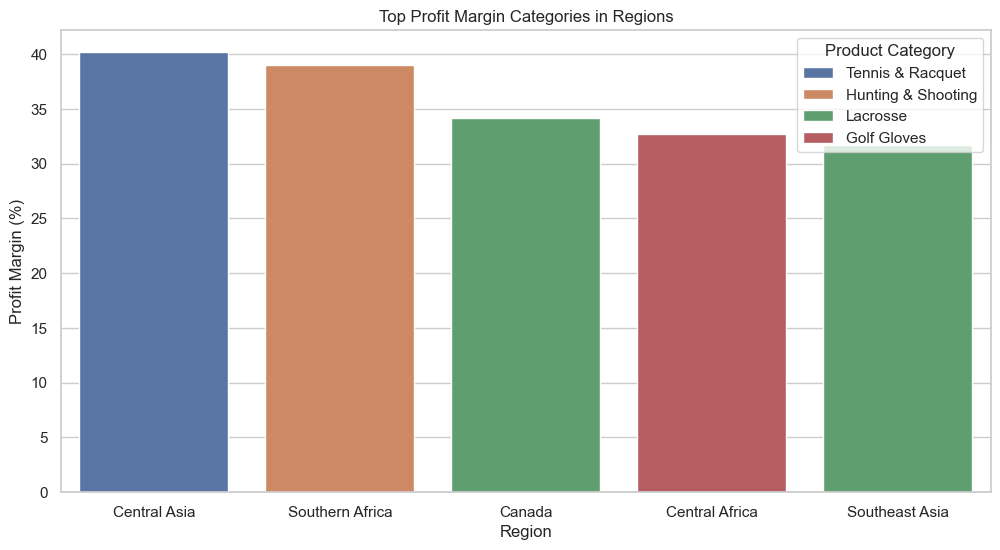

In [42]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=distinctive_regions, x='Order Region', y='Profit Margin (%)', hue='Category Name', dodge=False)
plt.title('Top Profit Margin Categories in Regions')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.legend(title='Product Category')
plt.show()